In [146]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
import clean
import preproc
import pandas as pd
import numpy as np

In [197]:
import prophet

In [64]:
from datetime import datetime

datetime_object = datetime.strptime('2008-12-31', '%y-%m-%d')

ValueError: time data '2008-12-31' does not match format '%y-%m-%d'

In [75]:
pd.to_datetime("2008-12-31").year>2010

False

In [80]:
ts_centro.ds = ts_centro.ds.map(pd.to_datetime)

In [82]:
ts_centro.dtypes

ds    datetime64[ns]
y              int64
dtype: object

# Reimport the data

In [36]:
data1, data2, data3, data4 = clean.get_data()
data = clean.clean_all(data1, data2, data3, data4, clean.get_bairros_data())

In [148]:
data.dtypes

Crime_ID                  object
Crime_sub_type            object
Crime_type                object
Police_station            object
Place_type                object
Test_Date_Time            object
Date_Time         datetime64[ns]
Neighborhood              object
AR                        object
Date                      object
dtype: object

In [149]:
data = data[data["Date_Time"] <= "2019-12-31"]

In [150]:
data

Crime_ID             Crime_sub_type     Crime_type  \
0        00787401-2009      Lesão corporal dolosa  Não se aplica   
1        01137431-2009      Lesão corporal dolosa  Não se aplica   
2        02023941-2009      Lesão corporal dolosa  Não se aplica   
4        04751871-2009      Lesão corporal dolosa  Não se aplica   
5        04909311-2009                     Ameaça  Não se aplica   
...                ...                        ...            ...   
1219355  94474991-2019  Furto de telefone celular          Furto   
1219362  96324351-2019         Roubo a transeunte          Roubo   
1219363  96730181-2019          Roubo em coletivo          Roubo   
1219365  98313421-2019         Furto a transeunte          Furto   
1219366  98452031-2019         Furto a transeunte          Furto   

                    Police_station            Place_type    Test_Date_Time  \
0         043a. Pedra de Guaratiba                 Praia  2009-01-01 04:30   
1               035a. Campo Grande            Residência  2009-01-01 19:00   
2             040a. Honório Gurgel            Residência  2008-12-31 20:30   
4               035a. Campo Grande           Via pública  2009-01-01 01:30   
5                     039a. Pavuna            Residência  2009-01-01 03:03   
...                            ...                   ...               ...   
1219355           001a. Praça Mauá                 Boate  2019-12-30 03:00   
1219362               020a. Grajaú           Via pública  2019-12-30 21:30   
1219363  027a. Vicente de Carvalho  Interior de coletivo  2019-12-19 20:55   
1219365           012a. Copacabana           Via pública  2019-12-29 19:00   
1219366               014a. Leblon  Interior de coletivo  2019-12-30 11:45   

                  Date_Time            Neighborhood            AR        Date  
0       2009-01-01 04:30:00      Pedra de Guaratiba     Guaratiba  2009-01-01  
1       2009-01-01 19:00:00              Santissimo  Campo Grande  2009-01-01  
2       2008-12-31 20:30:00          Honorio Gurgel     Madureira  2008-12-31  
4       2009-01-01 01:30:00            Campo Grande  Campo Grande  2009-01-01  
5       2009-01-01 03:03:00  Ricardo de Albuquerque      Anchieta  2009-01-01  
...                     ...                     ...           ...         ...  
1219355 2019-12-30 03:00:00                   Saude     Portuaria  2019-12-30  
1219362 2019-12-30 21:30:00                  Grajau   Vila Isabel  2019-12-30  
1219363 2019-12-19 20:55:00                   Iraja         Iraja  2019-12-19  
1219365 2019-12-29 19:00:00              Copacabana    Copacabana  2019-12-29  
1219366 2019-12-30 11:45:00                  Centro        Centro  2019-12-30  

[1188386 rows x 10 columns]

In [151]:
data.Date_Time.max()

Timestamp('2019-12-31 00:00:00')

In [481]:
df1, df2 = preproc.get_format(data)

In [257]:
df1

nb_crimes                                                     \
AR          Anchieta Bangu Barra da Tijuca Botafogo Campo Grande Centro   
Date                                                                      
2008-12-31         4     4               3        0            6      2   
2009-01-01        10    21              15       12           38      3   
2009-01-02         5     7               3        2           26      6   
2009-01-03         1    18               5        3           16      3   
2009-01-04         1    13               2        3           19      6   
...              ...   ...             ...      ...          ...    ...   
2019-12-27         5     8              14       15           11     23   
2019-12-28         7    16              11        9           13     16   
2019-12-29         9     7               9       11            7      7   
2019-12-30         5    14              12       10            8     10   
2019-12-31         0     0               0        0            1      0   

                                                                   ...        \
AR         Cidade de Deus Complexo do Alemao Copacabana Guaratiba  ... Ramos   
Date                                                               ...         
2008-12-31              0                  0          5         5  ...     1   
2009-01-01              2                  0         10        11  ...     9   
2009-01-02              0                  0          8         2  ...     5   
2009-01-03              2                  0          6         5  ...     6   
2009-01-04              1                  0          5         2  ...     5   
...                   ...                ...        ...       ...  ...   ...   
2019-12-27              0                  0          9         2  ...     5   
2019-12-28              0                  0         19         3  ...     5   
2019-12-29              2                  1         29         1  ...     4   
2019-12-30              1                  0         10         3  ...     3   
2019-12-31              0                  0          1         0  ...     0   

                                                                  \
AR         Realengo Rio Comprido Rocinha Santa Cruz Santa Teresa   
Date                                                               
2008-12-31        4            1       0          1            1   
2009-01-01        9            7       1         22            0   
2009-01-02        5            1       0         10            2   
2009-01-03        8            3       1          5            1   
2009-01-04        7            7       0         15            0   
...             ...          ...     ...        ...          ...   
2019-12-27       11            3       0          3            1   
2019-12-28        9            2       0          2            2   
2019-12-29        9            4       0          5            2   
2019-12-30        4            0       1          5            1   
2019-12-31        0            0       0          0            0   

                                                           
AR         Sao Cristovao Tijuca Vigario Geral Vila Isabel  
Date                                                       
2008-12-31             3      1             0           0  
2009-01-01             4      2             2           7  
2009-01-02             1      4             2           5  
2009-01-03             3      3             5           2  
2009-01-04             7      2             0           1  
...                  ...    ...           ...         ...  
2019-12-27             3     12             5           7  
2019-12-28             3      3             2           8  
2019-12-29             3      3             4           4  
2019-12-30             3      6             2           5  
2019-12-31             0      0             0           0  

[4018 rows x 33 columns]

In [258]:
ts_anchieta = preproc.extract_ts(df1,"Anchieta")
ts_centro = preproc.extract_ts(df1,"Centro")

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [259]:
ts_centro

ds   y
0    2008-12-31   2
1    2009-01-01   3
2    2009-01-02   6
3    2009-01-03   3
4    2009-01-04   6
...         ...  ..
4013 2019-12-27  23
4014 2019-12-28  16
4015 2019-12-29   7
4016 2019-12-30  10
4017 2019-12-31   0

[4018 rows x 2 columns]

In [260]:
ts_centro.dtypes

ds    datetime64[ns]
y              int64
dtype: object

# Modeling with prophet

In [261]:
from fbprophet import Prophet 

## make date as date time format

In [262]:
centro_train = ts_centro[ts_centro["ds"].dt.year<2019]

In [263]:
centro_train

ds   y
0    2008-12-31   2
1    2009-01-01   3
2    2009-01-02   6
3    2009-01-03   3
4    2009-01-04   6
...         ...  ..
3648 2018-12-27  25
3649 2018-12-28  37
3650 2018-12-29  37
3651 2018-12-30  26
3652 2018-12-31  20

[3653 rows x 2 columns]

In [264]:
centro_test = ts_centro[ts_centro["ds"].dt.year>=2019]
centro_test = centro_test[centro_test["ds"].dt.month>=2]

In [265]:
model_centro = Prophet(interval_width=0.95,
                 seasonality_mode='multiplicative')

In [266]:
model_centro.add_country_holidays(country_name='BR')

In [267]:
model_centro.fit(centro_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.96333
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9592.53    0.00154725       305.061      0.1897           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9600.05    0.00301868       282.465           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9601.83    0.00120592       184.658           1           1      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        9604.1    0.00382884        248.99      0.6942     0.06942      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     478       9605.16   4.28944e-05       96.8592   1.663e-07       0.001      648  LS failed, Hessian reset 
     499       9605.18   1.61546e-05    

80   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     502       9605.18   1.59644e-05        47.329   2.381e-07       0.001      729  LS failed, Hessian reset 
     507       9605.18    2.3729e-07       50.8301     0.06401           1      739   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [268]:
future = model_centro.make_future_dataframe(periods=365)

In [269]:
y_pred_centro = model_centro.predict(future)

In [270]:
y_pred_centro.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
4013 2019-12-27  24.070331  -12.441269   56.278338    19.074460    28.310001   
4014 2019-12-28  24.067548   -8.058123   58.721937    19.048164    28.327004   
4015 2019-12-29  24.064765  -14.446770   54.481306    19.021868    28.344007   
4016 2019-12-30  24.061982  -14.407299   56.433128    18.995571    28.360939   
4017 2019-12-31  24.059199  -12.527037   56.742886    18.969275    28.373561   

      All Souls' Day  All Souls' Day_lower  All Souls' Day_upper  Christmas  \
4013             0.0                   0.0                   0.0        0.0   
4014             0.0                   0.0                   0.0        0.0   
4015             0.0                   0.0                   0.0        0.0   
4016             0.0                   0.0                   0.0        0.0   
4017             0.0                   0.0                   0.0        0.0   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
4013  ...  0.116301      0.116301      0.116301 -0.099132     -0.099132   
4014  ...  0.071954      0.071954      0.071954 -0.091432     -0.091432   
4015  ... -0.091135     -0.091135     -0.091135 -0.084390     -0.084390   
4016  ...  0.010167      0.010167      0.010167 -0.078237     -0.078237   
4017  ... -0.013960     -0.013960     -0.013960 -0.073167     -0.073167   

      yearly_upper  additive_terms  additive_terms_lower  \
4013     -0.099132             0.0                   0.0   
4014     -0.091432             0.0                   0.0   
4015     -0.084390             0.0                   0.0   
4016     -0.078237             0.0                   0.0   
4017     -0.073167             0.0                   0.0   

      additive_terms_upper       yhat  
4013                   0.0  24.483599  
4014                   0.0  23.598782  
4015                   0.0  19.840795  
4016                   0.0  22.424095  
4017                   0.0  21.962995  

[5 rows x 46 columns]

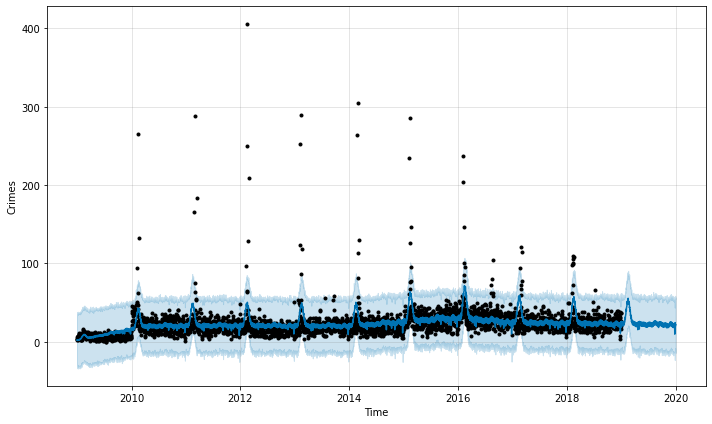

In [271]:
model_centro.plot(y_pred_centro,xlabel='Time',ylabel='Crimes');

In [272]:
import matplotlib.pyplot as plt

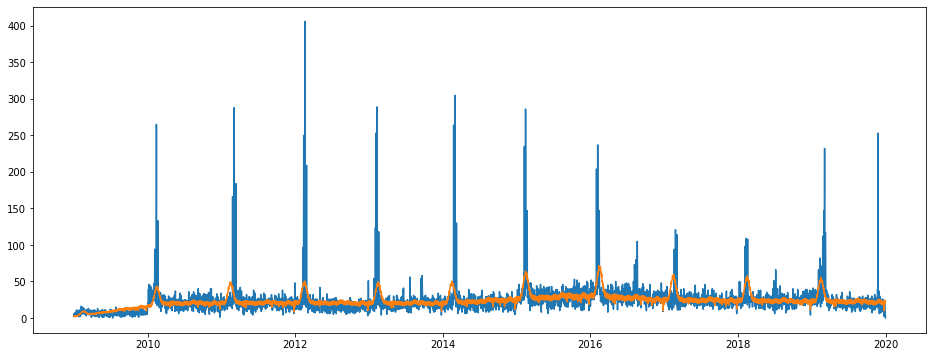

In [273]:
plt.figure(figsize=(16,6))
plt.plot(pd.concat([ts_centro.set_index("ds")["y"],y_pred_centro.set_index("ds")["yhat"]],axis=1));


In [274]:
def forecast_accuracy(forecast, actual):
    forecast = forecast.to_numpy()
    actual = actual.to_numpy()
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [275]:
forecast_accuracy(y_pred_centro.set_index("ds")["yhat"],ts_centro.set_index("ds")["y"])

/var/folders/7b/hgztdlzd4k76rwydg33k1vhm0000gn/T/ipykernel_70808/2213750890.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
/var/folders/7b/hgztdlzd4k76rwydg33k1vhm0000gn/T/ipykernel_70808/2213750890.py:7: RuntimeWarning: divide by zero encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)   # MPE


{'mape': inf,
 'me': 0.04364702105824374,
 'mae': 8.032641883474417,
 'mpe': inf,
 'rmse': 18.016017477363416,
 'corr': 0.4596363996222512,
 'minmax': 0.25603279774564636}

In [276]:
ts_centro_real = ts_centro.set_index("ds")["y"].to_numpy()

In [277]:
corr()y_pred_centro["yhat"]

SyntaxError: invalid syntax (3231772285.py, line 1)

# Baseline performances

In [278]:
df1 = df1.droplevel(level=0,axis=1)

In [279]:
df1.head()

AR          Anchieta  Bangu  Barra da Tijuca  Botafogo  Campo Grande  Centro  \
Date                                                                           
2008-12-31         4      4                3         0             6       2   
2009-01-01        10     21               15        12            38       3   
2009-01-02         5      7                3         2            26       6   
2009-01-03         1     18                5         3            16       3   
2009-01-04         1     13                2         3            19       6   

AR          Cidade de Deus  Complexo do Alemao  Copacabana  Guaratiba  ...  \
Date                                                                   ...   
2008-12-31               0                   0           5          5  ...   
2009-01-01               2                   0          10         11  ...   
2009-01-02               0                   0           8          2  ...   
2009-01-03               2                   0           6          5  ...   
2009-01-04               1                   0           5          2  ...   

AR          Ramos  Realengo  Rio Comprido  Rocinha  Santa Cruz  Santa Teresa  \
Date                                                                           
2008-12-31      1         4             1        0           1             1   
2009-01-01      9         9             7        1          22             0   
2009-01-02      5         5             1        0          10             2   
2009-01-03      6         8             3        1           5             1   
2009-01-04      5         7             7        0          15             0   

AR          Sao Cristovao  Tijuca  Vigario Geral  Vila Isabel  
Date                                                           
2008-12-31              3       1              0            0  
2009-01-01              4       2              2            7  
2009-01-02              1       4              2            5  
2009-01-03              3       3              5            2  
2009-01-04              7       2              0            1  

[5 rows x 33 columns]

In [280]:
df1 = df1.reset_index()

In [281]:
df1.dtypes

AR
Date                  object
Anchieta               int64
Bangu                  int64
Barra da Tijuca        int64
Botafogo               int64
Campo Grande           int64
Centro                 int64
Cidade de Deus         int64
Complexo do Alemao     int64
Copacabana             int64
Guaratiba              int64
Ilha do Governador     int64
Inhauma                int64
Iraja                  int64
Jacarepagua            int64
Jacarezinho            int64
Lagoa                  int64
Madureira              int64
Mare                   int64
Meier                  int64
Paqueta                int64
Pavuna                 int64
Penha                  int64
Portuaria              int64
Ramos                  int64
Realengo               int64
Rio Comprido           int64
Rocinha                int64
Santa Cruz             int64
Santa Teresa           int64
Sao Cristovao          int64
Tijuca                 int64
Vigario Geral          int64
Vila Isabel            int64
dtype: obje

In [314]:
df2.head()

nb_crimes                                                   \
AR          Anchieta     Bangu Barra da Tijuca  Botafogo Campo Grande   
Date                                                                    
2008-12-31  0.025522  0.009079        0.011007  0.000000     0.010674   
2009-01-01  0.063703  0.047398        0.052289  0.057072     0.066402   
2009-01-02  0.031852  0.015799        0.010458  0.009512     0.045433   
2009-01-03  0.006370  0.040626        0.017430  0.014268     0.027959   
2009-01-04  0.006370  0.029341        0.006972  0.014268     0.033201   

                                                                             \
AR            Centro Cidade de Deus Complexo do Alemao Copacabana Guaratiba   
Date                                                                          
2008-12-31  0.066617       0.000000                0.0   0.034691  0.050378   
2009-01-01  0.103458       0.198661                0.0   0.070387  0.083396   
2009-01-02  0.206917       0.000000                0.0   0.056310  0.015163   
2009-01-03  0.103458       0.198661                0.0   0.042232  0.037907   
2009-01-04  0.206917       0.099331                0.0   0.035194  0.015163   

            ...                                                       \
AR          ... Portuaria     Ramos  Realengo Rio Comprido   Rocinha   
Date        ...                                                        
2008-12-31  ...  0.000000  0.006877  0.026449     0.015969  0.000000   
2009-01-01  ...  0.029703  0.062168  0.046459     0.114169  0.014499   
2009-01-02  ...  0.000000  0.034538  0.025811     0.016310  0.000000   
2009-01-03  ...  0.059406  0.041445  0.041297     0.048929  0.014499   
2009-01-04  ...  0.000000  0.034538  0.036135     0.114169  0.000000   

                                                                        
AR         Santa Cruz Santa Teresa Sao Cristovao    Tijuca Vila Isabel  
Date                                                                    
2008-12-31   0.002863     0.057947      0.052674  0.006297    0.000000  
2009-01-01   0.062111     0.000000      0.072225  0.012807    0.053311  
2009-01-02   0.028232     0.192864      0.018056  0.025613    0.038079  
2009-01-03   0.014116     0.096432      0.054169  0.019210    0.015232  
2009-01-04   0.042349     0.000000      0.126394  0.012807    0.007616  

[5 rows x 30 columns]

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.34546
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9394.39    0.00115885       640.123     0.04978           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9402.28    0.00267509       96.0399           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       9403.03   2.73454e-05       77.7607   4.893e-07       0.001      331  LS failed, Hessian reset 
     299       9404.21     0.0025379       277.951      0.3716     0.03716      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        9406.7   9.65302e-05        67.784      0.2978           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9408.9   0.000520307    

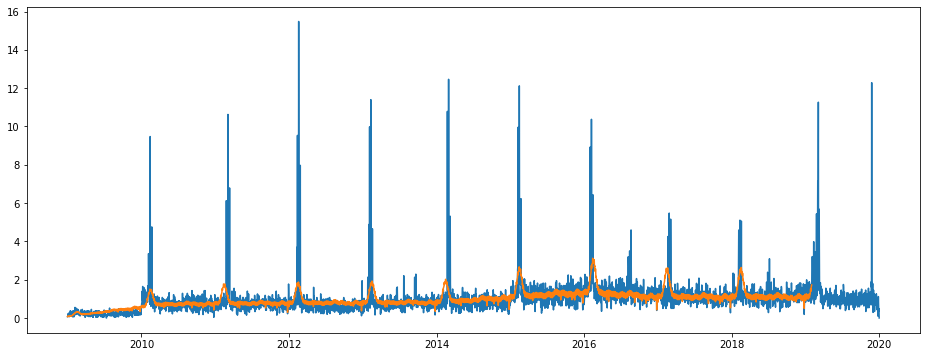

In [283]:
prophet.prophet_AR(df2,"Centro")

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.34546
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9394.39    0.00115885       640.123     0.04978           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9402.28    0.00267509       96.0399           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       9403.03   2.73454e-05       77.7607   4.893e-07       0.001      331  LS failed, Hessian reset 
     299       9404.21     0.0025379       277.951      0.3716     0.03716      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        9406.7   9.65302e-05        67.784      0.2978           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9408.9   0.000520307    

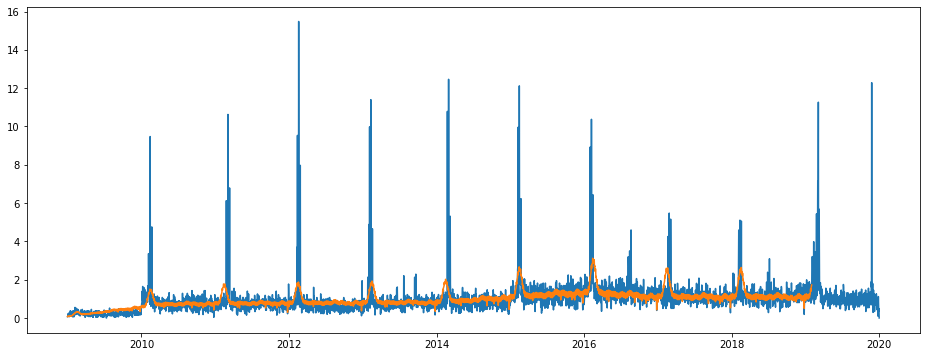

In [284]:
prophet.prophet_AR(df2,"Centro")

In [285]:
import metrics

In [303]:
from datetime import datetime, date

In [318]:
metrics.get_baseline_actual(df2)

AR        Date  Anchieta     Bangu  Barra da Tijuca  Botafogo  Campo Grande  \
0   2019-01-01  0.050488  0.034350         0.041269  0.104977      0.017635   
1   2019-01-02  0.063110  0.047231         0.016508  0.082877      0.019104   
2   2019-01-03  0.037866  0.066552         0.033015  0.077351      0.036739   
3   2019-01-04  0.075732  0.047231         0.039205  0.077351      0.026452   
4   2019-01-05  0.037866  0.038643         0.041269  0.088402      0.016165   
5   2019-01-06  0.037866  0.057965         0.035079  0.044201      0.030860   
6   2019-01-07  0.063110  0.062259         0.028888  0.038676      0.016165   
7   2019-01-08  0.063110  0.040790         0.037142  0.055251      0.029391   
8   2019-01-09  0.044177  0.047231         0.051586  0.099452      0.027921   
9   2019-01-10  0.082043  0.068699         0.045396  0.049726      0.026452   
10  2019-01-11  0.063110  0.049378         0.043332  0.099452      0.023513   
11  2019-01-12  0.056799  0.068699         0.047459  0.093927      0.020574   
12  2019-01-13  0.063110  0.068699         0.055713  0.082877      0.017635   
13  2019-01-14  0.056799  0.047231         0.045396  0.104977      0.026452   
14  2019-01-15  0.056799  0.068699         0.047459  0.093927      0.017635   
15  2019-01-16  0.069421  0.060112         0.037142  0.127077      0.019104   
16  2019-01-17  0.050488  0.045084         0.016508  0.066301      0.029391   
17  2019-01-18  0.100976  0.064405         0.047459  0.044201      0.024982   
18  2019-01-19  0.050488  0.042937         0.043332  0.071826      0.017635   
19  2019-01-20  0.056799  0.057965         0.039205  0.082877      0.030860   
20  2019-01-21  0.100976  0.047231         0.033015  0.066301      0.023513   
21  2019-01-22  0.075732  0.025762         0.030952  0.116027      0.024982   
22  2019-01-23  0.094665  0.053671         0.037142  0.116027      0.024982   
23  2019-01-24  0.082043  0.053671         0.022698  0.077351      0.011756   
24  2019-01-25  0.100976  0.055818         0.039205  0.160228      0.032330   
25  2019-01-26  0.037866  0.023615         0.066030  0.088402      0.014695   
26  2019-01-27  0.056799  0.034350         0.078411  0.160228      0.019104   
27  2019-01-28  0.056799  0.040790         0.018571  0.071826      0.030860   
28  2019-01-29  0.094665  0.057965         0.039205  0.088402      0.023513   
29  2019-01-30  0.069421  0.055818         0.049523  0.160228      0.035269   
30  2019-01-31  0.056799  0.034350         0.045396  0.088402      0.020574   

AR    Centro  Cidade de Deus  Complexo do Alemao  Copacabana  ...  Portuaria  \
0   0.825611        0.031285            0.000000    1.616548  ...   0.072512   
1   1.117004        0.031285            0.000000    0.106137  ...   0.108767   
2   1.165569        0.000000            0.033976    0.048986  ...   0.181279   
3   1.748354        0.000000            0.000000    0.138795  ...   0.253791   
4   1.505527        0.093855            0.000000    0.106137  ...   0.217535   
5   1.991181        0.000000            0.016988    0.097973  ...   0.108767   
6   1.408396        0.000000            0.000000    0.114301  ...   0.326302   
7   0.971308        0.000000            0.000000    0.146959  ...   0.471325   
8   1.359831        0.000000            0.000000    0.122466  ...   0.145023   
9   0.922742        0.000000            0.000000    0.122466  ...   0.181279   
10  1.262700        0.000000            0.016988    0.171452  ...   0.181279   
11  1.845484        0.000000            0.000000    0.114301  ...   0.072512   
12  1.019873        0.000000            0.000000    0.073479  ...   0.072512   
13  0.874177        0.031285            0.000000    0.130630  ...   0.217535   
14  1.796919        0.000000            0.000000    0.155123  ...   0.362558   
15  0.922742        0.000000            0.000000    0.106137  ...   0.108767   
16  1.117004        0.000000            0.000000    0.163288  ...   0.145023   
17  1.602657        0.031285   

In [321]:
metrics.get_baseline_predictions(df2)

/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  baseline_month_forecast = pd.concat([baseline_mean]*31).reset_index().drop(columns="index")


AR  Anchieta     Bangu  Barra da Tijuca  Botafogo  Campo Grande    Centro  \
0   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
1   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
2   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
3   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
4   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
5   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
6   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
7   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
8   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
9   0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
10  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
11  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
12  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
13  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
14  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
15  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
16  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
17  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
18  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
19  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
20  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
21  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
22  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
23  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
24  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
25  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
26  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
27  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
28  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
29  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   
30  0.075006  0.050096         0.035412  0.100462      0.026096  1.216809   

AR  Cidade de Deus  Complexo do Alemao  Copacabana  Guaratiba  ...  Portuaria  \
0          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
1          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
2          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
3          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
4          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
5          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
6          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
7          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
8          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
9          0.02062            0.005227    0.077762   0.013294  ...   0.184642   
10         0.02062            0.005227    0.077762   0.013294  ...   0.184642   
11         0.02062            0.005227    0.077762   0.013294  ...   0.184642   
12         0.02062            0.005227    0.077762   0.013294  ...   0.184642   
13         0.02062            0.005227    0.077762   0.013294  ...   0.184642   
14         0.02062            0.005227    0.077762   0.013294  ...   0.184642   
15         0.02062            0.005227    0.077762   0.013294  ...   0.184642   
16         0.02062            0.005227    0.077762   0.013294  ...   0.184642   
17         0.02062            0.005227    0.077762   0.013294  ...   0.184642

In [322]:
forecast_accuracy(metrics.get_baseline_predictions(df2),metrics.get_baseline_actual(df2) )

/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  baseline_month_forecast = pd.concat([baseline_mean]*31).reset_index().drop(columns="index")


ValueError: operands could not be broadcast together with shapes (31,30) (31,31) 

In [326]:
metrics.get_baseline_metrics("Centro", df2)

{'mape': 0.2500350339854775,
 'me': -0.10698944874995794,
 'mae': 0.33203825733821557,
 'mpe': -0.003314472747184232,
 'rmse': 0.38777667135896265,
 'corr': -2.017804952736975e-16,
 'minmax': 0.21914976372049}

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.34546
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9394.39    0.00115885       640.123     0.04978           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9402.28    0.00267509       96.0399           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       9403.03   2.73454e-05       77.7607   4.893e-07       0.001      331  LS failed, Hessian reset 
     299       9404.21     0.0025379       277.951      0.3716     0.03716      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        9406.7   9.65302e-05        67.784      0.2978           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9408.9   0.000520307    

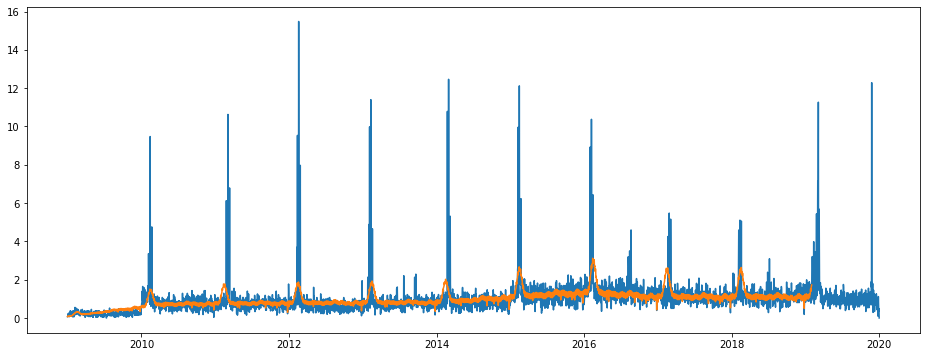

In [328]:
prophet.prophet_AR(df2, "Centro")

In [332]:
df2 = df2.droplevel(level=0,axis=1).reset_index()

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.34546
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9394.39    0.00115885       640.123     0.04978           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9402.28    0.00267509       96.0399           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       9403.03   2.73454e-05       77.7607   4.893e-07       0.001      331  LS failed, Hessian reset 
     299       9404.21     0.0025379       277.951      0.3716     0.03716      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        9406.7   9.65302e-05        67.784      0.2978           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9408.9   0.000520307    

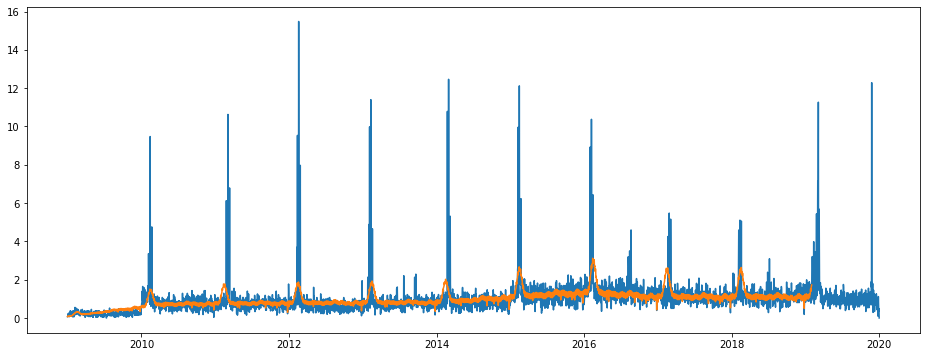

In [339]:
forecast = prophet.prophet_AR(df2, "Centro")

In [340]:
forecast

yhat
0     0.075022
1     0.062641
2     0.092048
3     0.090514
4     0.077210
...        ...
3679  1.392190
3680  1.571691
3681  1.616895
3682  1.648093
3683  1.724154

[3684 rows x 1 columns]

In [342]:
df2

nb_crimes                                                   \
AR          Anchieta     Bangu Barra da Tijuca  Botafogo Campo Grande   
Date                                                                    
2008-12-31  0.025522  0.009079        0.011007  0.000000     0.010674   
2009-01-01  0.063703  0.047398        0.052289  0.057072     0.066402   
2009-01-02  0.031852  0.015799        0.010458  0.009512     0.045433   
2009-01-03  0.006370  0.040626        0.017430  0.014268     0.027959   
2009-01-04  0.006370  0.029341        0.006972  0.014268     0.033201   
...              ...       ...             ...       ...          ...   
2019-12-27  0.031555  0.017175        0.028888  0.082877     0.016165   
2019-12-28  0.044177  0.034350        0.022698  0.049726     0.019104   
2019-12-29  0.056799  0.015028        0.018571  0.060776     0.010287   
2019-12-30  0.031555  0.030056        0.024761  0.055251     0.011756   
2019-12-31  0.000000  0.000000        0.000000  0.000000     0.001470   

                                                                             \
AR            Centro Cidade de Deus Complexo do Alemao Copacabana Guaratiba   
Date                                                                          
2008-12-31  0.066617       0.000000           0.000000   0.034691  0.050378   
2009-01-01  0.103458       0.198661           0.000000   0.070387  0.083396   
2009-01-02  0.206917       0.000000           0.000000   0.056310  0.015163   
2009-01-03  0.103458       0.198661           0.000000   0.042232  0.037907   
2009-01-04  0.206917       0.099331           0.000000   0.035194  0.015163   
...              ...            ...                ...        ...       ...   
2019-12-27  1.117004       0.000000           0.000000   0.073479  0.007922   
2019-12-28  0.777046       0.000000           0.000000   0.155123  0.011884   
2019-12-29  0.339958       0.062570           0.016988   0.236767  0.003961   
2019-12-30  0.485654       0.031285           0.000000   0.081644  0.011884   
2019-12-31  0.000000       0.000000           0.000000   0.008164  0.000000   

            ...                                                       \
AR          ... Portuaria     Ramos  Realengo Rio Comprido   Rocinha   
Date        ...                                                        
2008-12-31  ...  0.000000  0.006877  0.026449     0.015969  0.000000   
2009-01-01  ...  0.029703  0.062168  0.046459     0.114169  0.014499   
2009-01-02  ...  0.000000  0.034538  0.025811     0.016310  0.000000   
2009-01-03  ...  0.059406  0.041445  0.041297     0.048929  0.014499   
2009-01-04  ...  0.000000  0.034538  0.036135     0.114169  0.000000   
...         ...       ...       ...       ...          ...       ...   
2019-12-27  ...  0.108767  0.036309  0.047438     0.060599  0.000000   
2019-12-28  ...  0.072512  0.036309  0.038813     0.040399  0.000000   
2019-12-29  ...  0.036256  0.029047  0.038813     0.080799  0.000000   
2019-12-30  ...  0.072512  0.021785  0.017250     0.000000  0.011689   
2019-12-31  ...  0.000000  0.000000  0.000000     0.000000  0.000000   

                                                                        
AR         Santa Cruz Santa Teresa Sao Cristovao    Tijuca Vila Isabel  
Date                                                                    
2008-12-31   0.002863     0.057947      0.052674  0.006297    0.000000  
2009-01-01   0.062111     0.000000      0.072225  0.012807    0.053311  
2009-01-02   0.028232     0.192864      0.018056  0.025613    0.038079  
2009-01-03   0.014116     0.096432      0.054169  0.019210    0.015232  
2009-01-04   0.042349     0.000000      0.126394  0.012807    0.007616  
...               ...          ...           ...       ...         ...  
2019-12-27   0.007407     0.033653      0.071630  0.091264    0.050575  
2019-12-28   0.004938     0.067305      0.071630  0.022816    0.057800  
2019-12-29   0.012346     0.067305      0.071630  0.022816    0.02890

In [343]:
prophet.get_prophet_metrics(df2, "Centro")

KeyError: 'Centro'

In [348]:
df2 = df2.droplevel(level=0,axis=1).reset_index()

In [357]:
df2_temp = df2.droplevel(level=0,axis=1).reset_index()

In [359]:
actual = df2_temp["Centro"]

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -8.34546
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9394.39    0.00115885       640.123     0.04978           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9402.28    0.00267509       96.0399           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       9403.03   2.73454e-05       77.7607   4.893e-07       0.001      331  LS failed, Hessian reset 
     299       9404.21     0.0025379       277.951      0.3716     0.03716      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        9406.7   9.65302e-05        67.784      0.2978           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        9408.9   0.000520307    

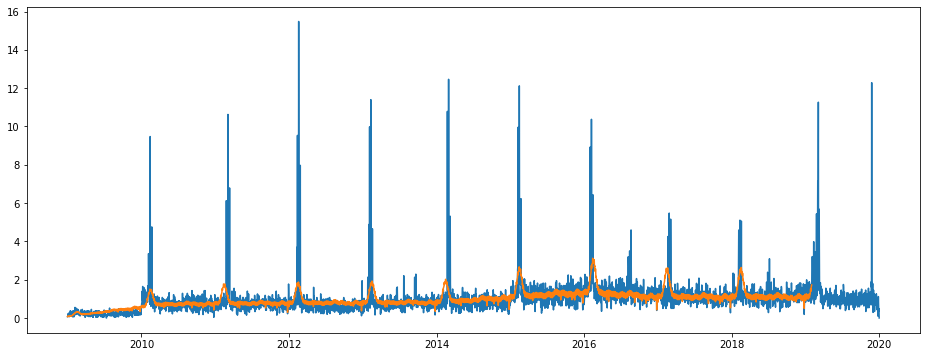

In [361]:
forecast = prophet.prophet_AR(df2,"Centro")

In [362]:
forecast

yhat
0     0.075022
1     0.062641
2     0.092048
3     0.090514
4     0.077210
...        ...
3679  1.392190
3680  1.571691
3681  1.616895
3682  1.648093
3683  1.724154

[3684 rows x 1 columns]

In [363]:
metrics.forecast_accuracy(forecast, actual)

/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:40: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:43: RuntimeWarning: divide by zero encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)   # MPE


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 4018

In [364]:
actual.shape

(4018,)

In [365]:
forecast.shape

(3684, 1)

In [367]:
d1=date(2009,1,1)
d2=date(2019,12,31)

In [369]:
d2-d1

datetime.timedelta(days=4016)

In [370]:
4016*0.8 

3212.8

In [374]:
from datetime import timedelta

In [376]:
d3 = d1+ timedelta(days=3213)  

In [377]:
d3 - d2

datetime.timedelta(days=-803)

In [378]:
metrics.get_baseline_actual(df2)

AR         Date  Anchieta     Bangu  Barra da Tijuca  Botafogo  Campo Grande  \
0    2017-10-19  0.101069  0.054157         0.043312  0.069618      0.021266   
1    2017-10-20  0.101069  0.023829         0.038753  0.042842      0.025823   
2    2017-10-21  0.031584  0.025995         0.038753  0.048197      0.022785   
3    2017-10-22  0.113702  0.032494         0.029634  0.101750      0.022785   
4    2017-10-23  0.069485  0.047658         0.027355  0.053553      0.028861   
..          ...       ...       ...              ...       ...           ...   
799  2019-12-27  0.031555  0.017175         0.028888  0.082877      0.016165   
800  2019-12-28  0.044177  0.034350         0.022698  0.049726      0.019104   
801  2019-12-29  0.056799  0.015028         0.018571  0.060776      0.010287   
802  2019-12-30  0.031555  0.030056         0.024761  0.055251      0.011756   
803  2019-12-31  0.000000  0.000000         0.000000  0.000000      0.001470   

AR     Centro  Cidade de Deus  Complexo do Alemao  Copacabana  ...  Portuaria  \
0    0.678905        0.000000            0.000000    0.079161  ...   0.278325   
1    1.086248        0.000000            0.000000    0.102909  ...   0.139162   
2    1.176769        0.030665            0.000000    0.047496  ...   0.104372   
3    0.950467        0.030665            0.016782    0.047496  ...   0.243534   
4    0.905207        0.000000            0.016782    0.063328  ...   0.173953   
..        ...             ...                 ...         ...  ...        ...   
799  1.117004        0.000000            0.000000    0.073479  ...   0.108767   
800  0.777046        0.000000            0.000000    0.155123  ...   0.072512   
801  0.339958        0.062570            0.016988    0.236767  ...   0.036256   
802  0.485654        0.031285            0.000000    0.081644  ...   0.072512   
803  0.000000        0.000000            0.000000    0.008164  ...   0.000000   

AR      Ramos  Realengo  Rio Comprido   Rocinha  Santa Cruz  Santa Teresa  \
0    0.107736  0.038623      0.173929  0.000000    0.027864      0.032444   
1    0.086188  0.064371      0.231905  0.000000    0.022798      0.064888   
2    0.064641  0.034331      0.096627  0.012186    0.015199      0.162221   
3    0.043094  0.047205      0.057976  0.000000    0.015199      0.064888   
4    0.050277  0.042914      0.154603  0.012186    0.030397      0.032444   
..        ...       ...           ...       ...         ...           ...   
799  0.036309  0.047438      0.060599  0.000000    0.007407      0.033653   
800  0.036309  0.038813      0.040399  0.000000    0.004938      0.067305   
801  0.029047  0.038813      0.080799  0.000000    0.012346      0.067305   
802  0.021785  0.017250      0.000000  0.011689    0.012346      0.033653   
803  0.000000  0.000000      0.000000  0.000000    0.000000      0.000000   

AR   Sao Cristovao    Tijuca  Vila Isabel  
0         0.157774  0.073385     0.083870  
1         0.428242  0.088062     0.118816  
2         0.180313  0.080723     0.062903  
3         0.090156  0.036692     0.076881  
4         0.157774  0.095400     0.062903  
..             ...       ...          ...  
799       0.071630  0.091264     0.050575  
800       0.071630  0.022816     0.057800  
801       0.071630  0.022816     0.028900  
802       0.071630  0.045632     0.036125  
803       0.000000  0.000000     0.000000  

[804 rows x 31 columns]

In [380]:
metrics.get_baseline_predictions(df2)

/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return baseline_month_forecast


AR  Anchieta     Bangu  Barra da Tijuca  Botafogo  Campo Grande    Centro  \
0   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
1   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
2   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
3   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
4   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
5   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
6   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
7   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
8   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
9   0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
10  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
11  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
12  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
13  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
14  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
15  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
16  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
17  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
18  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
19  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
20  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
21  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
22  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
23  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
24  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
25  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
26  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
27  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
28  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
29  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   
30  0.088964  0.044588         0.044579  0.086495      0.025989  1.185636   

AR  Cidade de Deus  Complexo do Alemao  Copacabana  Guaratiba  ...  Portuaria  \
0         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
1         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
2         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
3         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
4         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
5         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
6         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
7         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
8         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
9         0.023482            0.004638    0.085854     0.0118  ...   0.163633   
10        0.023482            0.004638    0.085854     0.0118  ...   0.163633   
11        0.023482            0.004638    0.085854     0.0118  ...   0.163633   
12        0.023482            0.004638    0.085854     0.0118  ...   0.163633   
13        0.023482            0.004638    0.085854     0.0118  ...   0.163633   
14        0.023482            0.004638    0.085854     0.0118  ...   0.163633   
15        0.023482            0.004638    0.085854     0.0118  ...   0.163633   
16        0.023482            0.004638    0.085854     0.0118  ...   0.163633   
17        0.023482            0.004638    0.085854     0.0118  ...   0.163633

In [384]:
actual = metrics.get_baseline_actual(df2)

In [385]:
actual.shape

(804, 31)

In [386]:
baseline = metrics.get_baseline_predictions(df2)

/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return baseline_month_forecast


In [387]:
baseline.shape

(804, 30)

In [388]:
actual.head()

AR        Date  Anchieta     Bangu  Barra da Tijuca  Botafogo  Campo Grande  \
0   2017-10-19  0.101069  0.054157         0.043312  0.069618      0.021266   
1   2017-10-20  0.101069  0.023829         0.038753  0.042842      0.025823   
2   2017-10-21  0.031584  0.025995         0.038753  0.048197      0.022785   
3   2017-10-22  0.113702  0.032494         0.029634  0.101750      0.022785   
4   2017-10-23  0.069485  0.047658         0.027355  0.053553      0.028861   

AR    Centro  Cidade de Deus  Complexo do Alemao  Copacabana  ...  Portuaria  \
0   0.678905        0.000000            0.000000    0.079161  ...   0.278325   
1   1.086248        0.000000            0.000000    0.102909  ...   0.139162   
2   1.176769        0.030665            0.000000    0.047496  ...   0.104372   
3   0.950467        0.030665            0.016782    0.047496  ...   0.243534   
4   0.905207        0.000000            0.016782    0.063328  ...   0.173953   

AR     Ramos  Realengo  Rio Comprido   Rocinha  Santa Cruz  Santa Teresa  \
0   0.107736  0.038623      0.173929  0.000000    0.027864      0.032444   
1   0.086188  0.064371      0.231905  0.000000    0.022798      0.064888   
2   0.064641  0.034331      0.096627  0.012186    0.015199      0.162221   
3   0.043094  0.047205      0.057976  0.000000    0.015199      0.064888   
4   0.050277  0.042914      0.154603  0.012186    0.030397      0.032444   

AR  Sao Cristovao    Tijuca  Vila Isabel  
0        0.157774  0.073385     0.083870  
1        0.428242  0.088062     0.118816  
2        0.180313  0.080723     0.062903  
3        0.090156  0.036692     0.076881  
4        0.157774  0.095400     0.062903  

[5 rows x 31 columns]

In [392]:
metrics.get_baseline_metrics(df2, "Centro")

/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  baseline_mean = baseline_data.mean().to_frame().T
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


{'mape': 0.3299331161546445,
 'me': 0.005011632493738149,
 'mae': 0.3911805138404263,
 'mpe': 0.004226957803822036,
 'rmse': 0.8453137368681651,
 'corr': nan,
 'minmax': 0.23747275728916384}

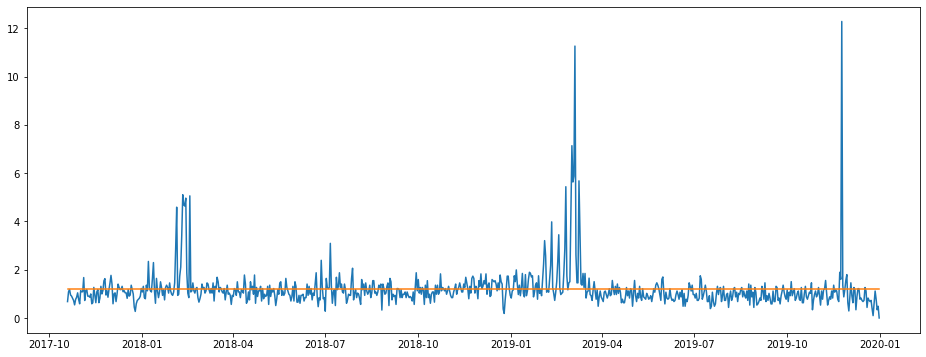

In [394]:
plt.figure(figsize=(16,6))
plt.plot(actual.Date, actual.Centro)
plt.plot(actual.Date, baseline.Centro)

/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:36: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  baseline_month_forecast = pd.concat([baseline_mean]*804).reset_index().drop(columns="index")


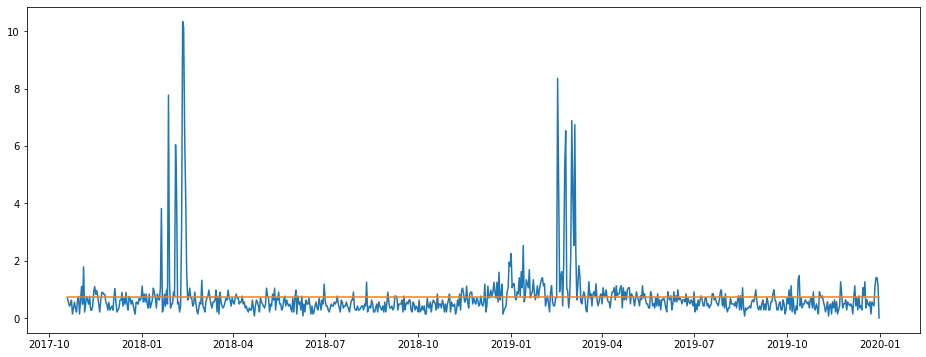

In [395]:
metrics.baseline_plt(df2,"Lagoa")

In [396]:
ts = preproc.extract_ts(df2,"Lagoa")

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [397]:
ts

ds         y
0    2008-12-31  0.006229
1    2009-01-01  0.056644
2    2009-01-02  0.025175
3    2009-01-03  0.025175
4    2009-01-04  0.025175
...         ...       ...
4013 2019-12-27  1.123248
4014 2019-12-28  1.404061
4015 2019-12-29  1.404061
4016 2019-12-30  1.123248
4017 2019-12-31  0.000000

[4018 rows x 2 columns]

In [402]:
from datetime import datetime #datetime(3000, 1, 1)

In [407]:
X_train = ts[ts["ds"] < datetime(2017,10,19)]

In [408]:
X_train

ds         y
0    2008-12-31  0.006229
1    2009-01-01  0.056644
2    2009-01-02  0.025175
3    2009-01-03  0.025175
4    2009-01-04  0.025175
...         ...       ...
3209 2017-10-14  0.411658
3210 2017-10-15  0.411658
3211 2017-10-16  0.205829
3212 2017-10-17  0.548878
3213 2017-10-18  0.480268

[3214 rows x 2 columns]

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.84562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8542.18     0.0262656       322.086       5.326      0.5326      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8547.79    0.00375666       195.546           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8549.09   0.000990267       165.737           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       8549.24   4.19909e-05       190.749   2.228e-07       0.001      431  LS failed, Hessian reset 
     399       8549.56   0.000984681       160.979           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       8550.23   0.000140727    

yhat
0     0.019055
1     0.019596
2     0.023203
3     0.031527
4     0.026757
...        ...
4013  0.280424
4014  0.395060
4015  0.349403
4016  0.231189
4017  0.286639

[4018 rows x 1 columns]

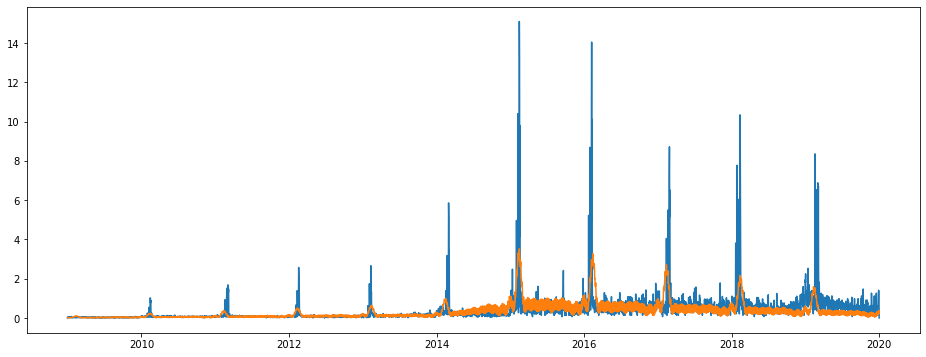

In [409]:
prophet.prophet_AR(df2,"Lagoa")

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.84562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8542.18     0.0262656       322.086       5.326      0.5326      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8547.79    0.00375666       195.546           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8549.09   0.000990267       165.737           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       8549.24   4.19909e-05       190.749   2.228e-07       0.001      431  LS failed, Hessian reset 
     399       8549.56   0.000984681       160.979           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       8550.23   0.000140727    

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4018 and the array at index 1 has size 1

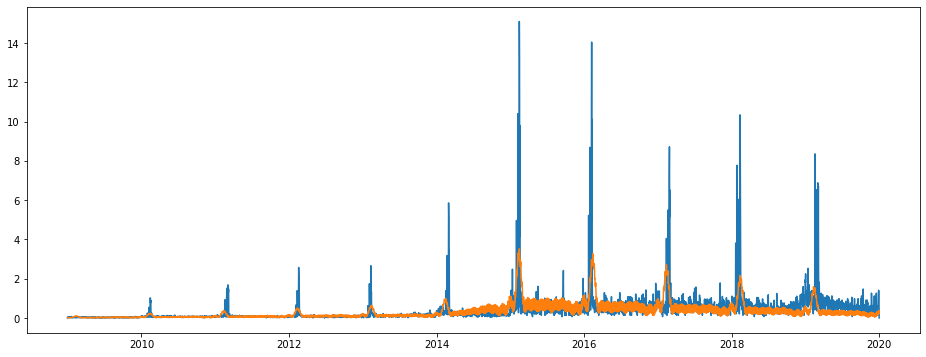

In [410]:
prophet.get_prophet_metrics(df2, "Lagoa")

In [417]:
actual = metrics.get_baseline_actual(df2)[["Lagoa"]]

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.84562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8542.18     0.0262656       322.086       5.326      0.5326      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8547.79    0.00375666       195.546           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8549.09   0.000990267       165.737           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       8549.24   4.19909e-05       190.749   2.228e-07       0.001      431  LS failed, Hessian reset 
     399       8549.56   0.000984681       160.979           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       8550.23   0.000140727    

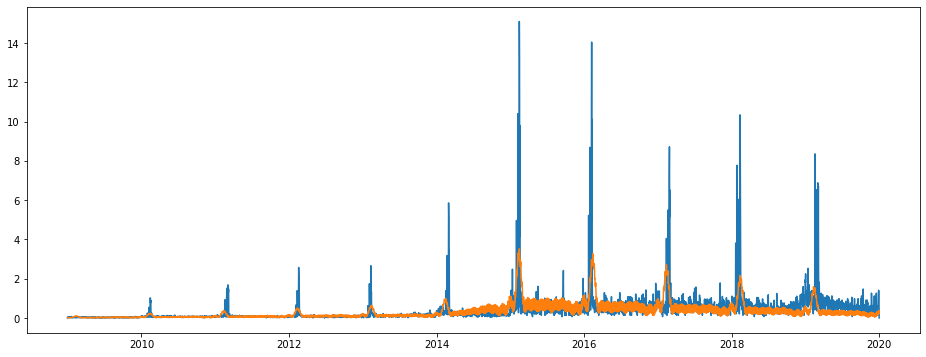

In [421]:
forecast = prophet.prophet_AR(df2,"Lagoa")

In [422]:
forecast

yhat
0     0.019055
1     0.019596
2     0.023203
3     0.031527
4     0.026757
...        ...
4013  0.280424
4014  0.395060
4015  0.349403
4016  0.231189
4017  0.286639

[4018 rows x 1 columns]

In [423]:
actual.shape

(804, 1)

In [428]:
forecast = forecast[3214:]

In [430]:
prophet_metrics = metrics.forecast_accuracy(forecast, actual)

In [431]:
prophet_metrics

{'mape': 1.6620787754136654,
 'me': 0.35171886977364986,
 'mae': 0.4616427636149935,
 'mpe': 1.5300169060629856,
 'rmse': 0.8800917172613019,
 'corr': nan,
 'minmax': 0.5143849305382171}

In [432]:
data

Crime_ID             Crime_sub_type     Crime_type  \
0        00787401-2009      Lesão corporal dolosa  Não se aplica   
1        01137431-2009      Lesão corporal dolosa  Não se aplica   
2        02023941-2009      Lesão corporal dolosa  Não se aplica   
4        04751871-2009      Lesão corporal dolosa  Não se aplica   
5        04909311-2009                     Ameaça  Não se aplica   
...                ...                        ...            ...   
1219355  94474991-2019  Furto de telefone celular          Furto   
1219362  96324351-2019         Roubo a transeunte          Roubo   
1219363  96730181-2019          Roubo em coletivo          Roubo   
1219365  98313421-2019         Furto a transeunte          Furto   
1219366  98452031-2019         Furto a transeunte          Furto   

                    Police_station            Place_type    Test_Date_Time  \
0         043a. Pedra de Guaratiba                 Praia  2009-01-01 04:30   
1               035a. Campo Grande            Residência  2009-01-01 19:00   
2             040a. Honório Gurgel            Residência  2008-12-31 20:30   
4               035a. Campo Grande           Via pública  2009-01-01 01:30   
5                     039a. Pavuna            Residência  2009-01-01 03:03   
...                            ...                   ...               ...   
1219355           001a. Praça Mauá                 Boate  2019-12-30 03:00   
1219362               020a. Grajaú           Via pública  2019-12-30 21:30   
1219363  027a. Vicente de Carvalho  Interior de coletivo  2019-12-19 20:55   
1219365           012a. Copacabana           Via pública  2019-12-29 19:00   
1219366               014a. Leblon  Interior de coletivo  2019-12-30 11:45   

                  Date_Time            Neighborhood            AR        Date  
0       2009-01-01 04:30:00      Pedra de Guaratiba     Guaratiba  2009-01-01  
1       2009-01-01 19:00:00              Santissimo  Campo Grande  2009-01-01  
2       2008-12-31 20:30:00          Honorio Gurgel     Madureira  2008-12-31  
4       2009-01-01 01:30:00            Campo Grande  Campo Grande  2009-01-01  
5       2009-01-01 03:03:00  Ricardo de Albuquerque      Anchieta  2009-01-01  
...                     ...                     ...           ...         ...  
1219355 2019-12-30 03:00:00                   Saude     Portuaria  2019-12-30  
1219362 2019-12-30 21:30:00                  Grajau   Vila Isabel  2019-12-30  
1219363 2019-12-19 20:55:00                   Iraja         Iraja  2019-12-19  
1219365 2019-12-29 19:00:00              Copacabana    Copacabana  2019-12-29  
1219366 2019-12-30 11:45:00                  Centro        Centro  2019-12-30  

[1188386 rows x 10 columns]

In [434]:
data.to_csv("raw_data/test.csv")

In [443]:
bairros = [df2.columns[i][1] for i in range(len(df2.columns))]

In [444]:
bairros

['Anchieta',
 'Bangu',
 'Barra da Tijuca',
 'Botafogo',
 'Campo Grande',
 'Centro',
 'Cidade de Deus',
 'Complexo do Alemao',
 'Copacabana',
 'Guaratiba',
 'Ilha do Governador',
 'Inhauma',
 'Iraja',
 'Jacarepagua',
 'Jacarezinho',
 'Lagoa',
 'Madureira',
 'Mare',
 'Meier',
 'Pavuna',
 'Portuaria',
 'Ramos',
 'Realengo',
 'Rio Comprido',
 'Rocinha',
 'Santa Cruz',
 'Santa Teresa',
 'Sao Cristovao',
 'Tijuca',
 'Vila Isabel']

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -25.2142
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5567.58    0.00830812       187.907           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5570.77   0.000114143       67.0065      0.4925      0.4925      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5570.95    0.00064666        90.246   7.655e-06       0.001      328  LS failed, Hessian reset 
     299       5571.12    0.00655489         68.33           1           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5571.31   0.000407249       118.799   4.618e-06       0.001      467  LS failed, Hessian reset 
     394       5571.64   2.46351e-07         53.34      0.1587           1      581   
Optimization terminat

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -25.2142
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5567.58    0.00830812       187.907           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5570.77   0.000114143       67.0065      0.4925      0.4925      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5570.95    0.00064666        90.246   7.655e-06       0.001      328  LS failed, Hessian reset 
     299       5571.12    0.00655489         68.33           1           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       5571.31   0.000407249       118.799   4.618e-06       0.001      467  LS failed, Hessian reset 
     394       5571.64   2.46351e-07         53.34      0.1587           1      581   
Optimization terminat

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -52.8273
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5528.36    0.00153299       166.792      0.1398      0.7869      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5536.17   0.000473149       84.9823           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5536.24    2.1812e-07       58.7417      0.3484      0.3484      319   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -52.8273
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5528.36    0.00153299       166.792      0.1398      0.7869      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5536.17   0.000473149       84.9823           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5536.24    2.1812e-07       58.7417      0.3484      0.3484      319   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -9.16196
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7809.05    0.00452304       267.802      0.1629           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7817.01     0.0022554         264.3      0.7734      0.7734      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       7822.78   0.000146076       239.711   1.133e-06       0.001      337  LS failed, Hessian reset 
     259       7824.31   7.38919e-05       127.139   1.018e-06       0.001      397  LS failed, Hessian reset 
     299       7824.96   0.000848974       225.438           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7826.98   0.000192244       114.469       3.632           1      583   
    Iter      log pro

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -9.16196
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7809.05    0.00452304       267.802      0.1629           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7817.01     0.0022554         264.3      0.7734      0.7734      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       7822.78   0.000146076       239.711   1.133e-06       0.001      337  LS failed, Hessian reset 
     259       7824.31   7.38919e-05       127.139   1.018e-06       0.001      397  LS failed, Hessian reset 
     299       7824.96   0.000848974       225.438           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7826.98   0.000192244       114.469       3.632           1      583   
    Iter      log pro

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -5.92631
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9103.57    0.00233761       796.444      0.1789      0.1789      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9112.94   0.000166849       64.3226      0.2244      0.7168      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       9117.41   5.51689e-05       217.565   3.533e-07       0.001      354  LS failed, Hessian reset 
     296       9119.81   2.27616e-05        89.314   1.529e-07       0.001      457  LS failed, Hessian reset 
     299       9119.86    0.00160814        176.19       3.414           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389       9121.79   9.14719e-05       323.292   3.694e-07       0.001      626  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.92631
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9103.57    0.00233761       796.444      0.1789      0.1789      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9112.94   0.000166849       64.3226      0.2244      0.7168      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       9117.41   5.51689e-05       217.565   3.533e-07       0.001      354  LS failed, Hessian reset 
     296       9119.81   2.27616e-05        89.314   1.529e-07       0.001      457  LS failed, Hessian reset 
     299       9119.86    0.00160814        176.19       3.414           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389       9121.79   9.14719e-05       323.292   3.694e-07       0.001      626  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -55.7341
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5402.57    0.00210841       101.582      0.4446           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       5405.04   0.000370491       54.1863   6.678e-06       0.001      269  LS failed, Hessian reset 
     199       5405.13   0.000105433       68.9681      0.5432      0.5432      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5405.16   1.53845e-05       68.7083    2.24e-07       0.001      395  LS failed, Hessian reset 
     299       5405.19   4.98661e-05       57.1176      0.7832      0.7832      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       5405.26   0.000144152       65.1288   1.572e-06       0.001      616  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -55.7341
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5402.57    0.00210841       101.582      0.4446           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       5405.04   0.000370491       54.1863   6.678e-06       0.001      269  LS failed, Hessian reset 
     199       5405.13   0.000105433       68.9681      0.5432      0.5432      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5405.16   1.53845e-05       68.7083    2.24e-07       0.001      395  LS failed, Hessian reset 
     299       5405.19   4.98661e-05       57.1176      0.7832      0.7832      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       5405.26   0.000144152       65.1288   1.572e-06       0.001      616  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -7.11903
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8164.82    0.00917751       448.797           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       8168.67   0.000105311       183.757   1.296e-06       0.001      262  LS failed, Hessian reset 
     199       8169.11   9.79278e-05       87.8793     0.07548           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       8169.28   2.97673e-05       63.0056   2.462e-07       0.001      372  LS failed, Hessian reset 
     296       8170.29   0.000165849       216.149   1.903e-06       0.001      497  LS failed, Hessian reset 
     299       8170.33    0.00049722       205.515           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.11903
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8164.82    0.00917751       448.797           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       8168.67   0.000105311       183.757   1.296e-06       0.001      262  LS failed, Hessian reset 
     199       8169.11   9.79278e-05       87.8793     0.07548           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       8169.28   2.97673e-05       63.0056   2.462e-07       0.001      372  LS failed, Hessian reset 
     296       8170.29   0.000165849       216.149   1.903e-06       0.001      497  LS failed, Hessian reset 
     299       8170.33    0.00049722       205.515           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -18.181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6554.83     0.0020448       311.584     0.05971           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6560.53     0.0374409       175.445           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6563.4    0.00215036       82.2092           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     360       6566.22     9.117e-05       79.4582    7.28e-07       0.001      505  LS failed, Hessian reset 
     399       6567.11     0.0017697       103.749      0.7137      0.7137      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6567.77   0.000141358     

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -18.181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6554.83     0.0020448       311.584     0.05971           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6560.53     0.0374409       175.445           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6563.4    0.00215036       82.2092           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     360       6566.22     9.117e-05       79.4582    7.28e-07       0.001      505  LS failed, Hessian reset 
     399       6567.11     0.0017697       103.749      0.7137      0.7137      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6567.77   0.000141358     

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -48.6876
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4833.58    0.00221538       137.194      0.3486           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141        4834.1   0.000234864        76.032   2.698e-06       0.001      217  LS failed, Hessian reset 
     169       4834.13   1.58285e-07       59.3169       0.276           1      257   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -48.6876
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4833.58    0.00221538       137.194      0.3486           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141        4834.1   0.000234864        76.032   2.698e-06       0.001      217  LS failed, Hessian reset 
     169       4834.13   1.58285e-07       59.3169       0.276           1      257   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:54: RuntimeWarning: divide by zero encountered in true_divide
  minmax = 1 - np.mean(mins/maxs)             # minmax
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Initial log joint probability = -5.85642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8337.24     0.0186872       496.191           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8555.67      0.845213       1072.34           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8694.65      0.127418       1280.04           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8764.88    0.00370414       838.004           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8783.89    0.00204609       657.283       0.346           1      620   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.85642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8337.24     0.0186872       496.191           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8555.67      0.845213       1072.34           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8694.65      0.127418       1280.04           1           1      367   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       8764.88    0.00370414       838.004           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       8783.89    0.00204609       657.283       0.346           1      620   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -58.5305
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5752.12     0.0130717       120.102           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174        5768.8   0.000208486       112.368    1.36e-06       0.001      269  LS failed, Hessian reset 
     199       5770.65   0.000372322       62.8385      0.8179      0.8179      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       5776.08    0.00445739       391.044    4.76e-05       0.001      439  LS failed, Hessian reset 
     299       5776.97    0.00515955       97.8398           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       5777.98   0.000289425       120.785   3.434e-06       0.001      548  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -58.5305
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5752.12     0.0130717       120.102           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174        5768.8   0.000208486       112.368    1.36e-06       0.001      269  LS failed, Hessian reset 
     199       5770.65   0.000372322       62.8385      0.8179      0.8179      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       5776.08    0.00445739       391.044    4.76e-05       0.001      439  LS failed, Hessian reset 
     299       5776.97    0.00515955       97.8398           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       5777.98   0.000289425       120.785   3.434e-06       0.001      548  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -57.7775
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4858.66    0.00639927       134.846      0.7144      0.7144      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       4863.23    0.00332498       228.108   3.576e-05       0.001      245  LS failed, Hessian reset 
     199       4863.97   7.61552e-05        73.003      0.2308           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       4864.09   2.73653e-07       74.8367       0.335      0.9176      402   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/Documents/event-forecast-rio/prophet.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,6))
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -57.7775
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4858.66    0.00639927       134.846      0.7144      0.7144      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       4863.23    0.00332498       228.108   3.576e-05       0.001      245  LS failed, Hessian reset 
     199       4863.97   7.61552e-05        73.003      0.2308           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       4864.09   2.73653e-07       74.8367       0.335      0.9176      402   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -38.0612
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5916.54     0.0386248         260.3           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5924.65    0.00263875       83.1944           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5925.71   0.000763945       87.3014      0.3274           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5926.09    0.00137032       99.1057     0.09849           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       5926.11   0.000552274       127.933   5.573e-06       0.001      544  LS failed, Hessian reset 
     476       5926.23   2.39631e-07    

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -38.0612
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5916.54     0.0386248         260.3           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5924.65    0.00263875       83.1944           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5925.71   0.000763945       87.3014      0.3274           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5926.09    0.00137032       99.1057     0.09849           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       5926.11   0.000552274       127.933   5.573e-06       0.001      544  LS failed, Hessian reset 
     476       5926.23   2.39631e-07    

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -28.8822
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5098.07    0.00612061        367.19      0.3592           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5108.07     0.0694492       109.202           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5110.51    0.00027844       74.8694   1.562e-06       0.001      351  LS failed, Hessian reset 
     296        5110.9   0.000135391       71.3487   1.837e-06       0.001      464  LS failed, Hessian reset 
     299        5110.9   2.38539e-05       60.3983           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325        5110.9   5.51644e-07       66.5321       1.009      0.1009      508   
Optimization terminat

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.8822
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5098.07    0.00612061        367.19      0.3592           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5108.07     0.0694492       109.202           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5110.51    0.00027844       74.8694   1.562e-06       0.001      351  LS failed, Hessian reset 
     296        5110.9   0.000135391       71.3487   1.837e-06       0.001      464  LS failed, Hessian reset 
     299        5110.9   2.38539e-05       60.3983           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325        5110.9   5.51644e-07       66.5321       1.009      0.1009      508   
Optimization terminat

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -76.5088
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5712.33    0.00231716        120.78      0.9025      0.9025      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5718.19   0.000805715       89.6261           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5718.94   0.000738371       244.938   1.015e-05       0.001      356  LS failed, Hessian reset 
     299       5719.52    0.00028168        55.069      0.7481      0.7481      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     396        5719.9   0.000291482       77.7377   3.758e-06       0.001      579  LS failed, Hessian reset 
     399       5719.91    3.3898e-05       63.8999       1.151      0.2779      585   
    Iter      log pro

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -76.5088
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5712.33    0.00231716        120.78      0.9025      0.9025      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5718.19   0.000805715       89.6261           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5718.94   0.000738371       244.938   1.015e-05       0.001      356  LS failed, Hessian reset 
     299       5719.52    0.00028168        55.069      0.7481      0.7481      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     396        5719.9   0.000291482       77.7377   3.758e-06       0.001      579  LS failed, Hessian reset 
     399       5719.91    3.3898e-05       63.8999       1.151      0.2779      585   
    Iter      log pro

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -20.95
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5683.66   7.25685e-05       92.0046      0.4077           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5683.82   0.000457422       143.577   3.943e-06       0.001      244  LS failed, Hessian reset 
     199       5683.85   9.98294e-06       68.9498           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5683.86   3.42142e-05       87.7663   3.928e-07       0.001      351  LS failed, Hessian reset 
     236       5683.86   2.31877e-07       86.2087      0.5404      0.5404      383   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -20.95
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5683.66   7.25685e-05       92.0046      0.4077           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5683.82   0.000457422       143.577   3.943e-06       0.001      244  LS failed, Hessian reset 
     199       5683.85   9.98294e-06       68.9498           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       5683.86   3.42142e-05       87.7663   3.928e-07       0.001      351  LS failed, Hessian reset 
     236       5683.86   2.31877e-07       86.2087      0.5404      0.5404      383   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -5.84562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8542.18     0.0262656       322.086       5.326      0.5326      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8547.79    0.00375666       195.546           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8549.09   0.000990267       165.737           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       8549.24   4.19909e-05       190.749   2.228e-07       0.001      431  LS failed, Hessian reset 
     399       8549.56   0.000984681       160.979           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       8550.23   0.000140727    

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.84562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8542.18     0.0262656       322.086       5.326      0.5326      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8547.79    0.00375666       195.546           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8549.09   0.000990267       165.737           1           1      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       8549.24   4.19909e-05       190.749   2.228e-07       0.001      431  LS failed, Hessian reset 
     399       8549.56   0.000984681       160.979           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       8550.23   0.000140727    

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -14.3336
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6602.02    0.00191614       185.605      0.2687      0.2687      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6605.27    1.6802e-05       69.4061      0.5083      0.5083      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6605.83   0.000332687       85.1938      0.7166      0.7166      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     391        6605.9   1.23974e-06         68.03   1.753e-08       0.001      538  LS failed, Hessian reset 
     393        6605.9   1.42489e-07       60.7928     0.06553           1      542   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.3336
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6602.02    0.00191614       185.605      0.2687      0.2687      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6605.27    1.6802e-05       69.4061      0.5083      0.5083      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6605.83   0.000332687       85.1938      0.7166      0.7166      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     391        6605.9   1.23974e-06         68.03   1.753e-08       0.001      538  LS failed, Hessian reset 
     393        6605.9   1.42489e-07       60.7928     0.06553           1      542   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -7.79237
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7950.57    0.00166751       155.973      0.5893      0.5893      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       7950.78    6.7944e-05       117.027    8.49e-07       0.001      227  LS failed, Hessian reset 
     175       7951.05   3.65737e-05       62.1697   2.868e-07       0.001      325  LS failed, Hessian reset 
     199       7951.16   1.85438e-05       59.8464       0.628       0.628      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7951.24   3.47729e-07       59.5646      0.2197      0.4595      492   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.79237
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7950.57    0.00166751       155.973      0.5893      0.5893      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       7950.78    6.7944e-05       117.027    8.49e-07       0.001      227  LS failed, Hessian reset 
     175       7951.05   3.65737e-05       62.1697   2.868e-07       0.001      325  LS failed, Hessian reset 
     199       7951.16   1.85438e-05       59.8464       0.628       0.628      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       7951.24   3.47729e-07       59.5646      0.2197      0.4595      492   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -57.4477
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5754.35    0.00326954       79.6553       2.743      0.2743      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190       5765.28   0.000291013       126.949   1.105e-06       0.001      270  LS failed, Hessian reset 
     199       5765.71    0.00154884       66.6541           1           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       5769.75   0.000244091       128.958   1.365e-06       0.001      438  LS failed, Hessian reset 
     299       5770.49     0.0018605       87.7573      0.7848      0.7848      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       5773.12   0.000130722       57.0937   9.651e-07       0.001      564  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -57.4477
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5754.35    0.00326954       79.6553       2.743      0.2743      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     190       5765.28   0.000291013       126.949   1.105e-06       0.001      270  LS failed, Hessian reset 
     199       5765.71    0.00154884       66.6541           1           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     294       5769.75   0.000244091       128.958   1.365e-06       0.001      438  LS failed, Hessian reset 
     299       5770.49     0.0018605       87.7573      0.7848      0.7848      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       5773.12   0.000130722       57.0937   9.651e-07       0.001      564  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -33.7889
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5878.06     0.0137644       143.356           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5883.75   0.000375808       110.295      0.1459           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5884.97    0.00017504       100.172   1.348e-06       0.001      350  LS failed, Hessian reset 
     299       5885.49    0.00051813        75.623           1           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       5885.59   8.41374e-07       74.8564           1           1      553   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -33.7889
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5878.06     0.0137644       143.356           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5883.75   0.000375808       110.295      0.1459           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5884.97    0.00017504       100.172   1.348e-06       0.001      350  LS failed, Hessian reset 
     299       5885.49    0.00051813        75.623           1           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       5885.59   8.41374e-07       74.8564           1           1      553   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -17.0617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6714.77    0.00373435       286.466           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6721.32    0.00116964       106.847           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6724.56    0.00258286       185.389      0.1529      0.4298      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6726.89   0.000206441       95.6173           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485       6726.93   4.24161e-07       64.0456      0.3855           1      597   
Optimization terminated normally: 
  Convergence detected: relat

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -17.0617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6714.77    0.00373435       286.466           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6721.32    0.00116964       106.847           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6724.56    0.00258286       185.389      0.1529      0.4298      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6726.89   0.000206441       95.6173           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     485       6726.93   4.24161e-07       64.0456      0.3855           1      597   
Optimization terminated normally: 
  Convergence detected: relat

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -44.544
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5347.73     0.0011219       108.005      0.8804     0.08804      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       5354.56   0.000442367       172.212   3.329e-06       0.001      250  LS failed, Hessian reset 
     199       5355.67    6.2172e-06       74.2868      0.1965      0.1965      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5358.56   0.000466966       102.103   1.228e-06       0.001      434  LS failed, Hessian reset 
     299       5359.45    0.00150403       148.058   2.013e-05       0.001      515  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377        5359.7   2.39955e-05       75.2273   2.996e-07       0.001      654  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -44.544
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5347.73     0.0011219       108.005      0.8804     0.08804      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       5354.56   0.000442367       172.212   3.329e-06       0.001      250  LS failed, Hessian reset 
     199       5355.67    6.2172e-06       74.2868      0.1965      0.1965      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5358.56   0.000466966       102.103   1.228e-06       0.001      434  LS failed, Hessian reset 
     299       5359.45    0.00150403       148.058   2.013e-05       0.001      515  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377        5359.7   2.39955e-05       75.2273   2.996e-07       0.001      654  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -33.7732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5189.02    0.00396337       200.775      0.3462           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5194.22   0.000187979       81.0334           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5194.41   0.000288817       110.783   1.782e-06       0.001      343  LS failed, Hessian reset 
     299       5194.53   2.65986e-05       76.1071           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5194.61   0.000203445       76.7679   2.776e-06       0.001      502  LS failed, Hessian reset 
     399        5194.7   5.87976e-05       65.7278      0.7836      0.7836      598   
    Iter      log pro

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -33.7732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5189.02    0.00396337       200.775      0.3462           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5194.22   0.000187979       81.0334           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5194.41   0.000288817       110.783   1.782e-06       0.001      343  LS failed, Hessian reset 
     299       5194.53   2.65986e-05       76.1071           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       5194.61   0.000203445       76.7679   2.776e-06       0.001      502  LS failed, Hessian reset 
     399        5194.7   5.87976e-05       65.7278      0.7836      0.7836      598   
    Iter      log pro

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -20.1671
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6001.42    0.00328908       86.7398      0.8499      0.8499      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138        6003.4   0.000149744        91.209   1.239e-06       0.001      219  LS failed, Hessian reset 
     199       6004.22   6.99666e-05       64.6119        0.79        0.79      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       6004.79   0.000198157       63.2509    8.41e-07       0.001      405  LS failed, Hessian reset 
     299       6004.98    0.00671326       109.271           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       6005.02   0.000102264       74.0746   1.627e-06       0.001      510  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -20.1671
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6001.42    0.00328908       86.7398      0.8499      0.8499      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138        6003.4   0.000149744        91.209   1.239e-06       0.001      219  LS failed, Hessian reset 
     199       6004.22   6.99666e-05       64.6119        0.79        0.79      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       6004.79   0.000198157       63.2509    8.41e-07       0.001      405  LS failed, Hessian reset 
     299       6004.98    0.00671326       109.271           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       6005.02   0.000102264       74.0746   1.627e-06       0.001      510  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -33.7549
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5102.01   0.000594787       88.6142      0.6551      0.6551      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5102.88   4.11059e-05       81.7681      0.1478      0.1478      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5103.94   0.000106985       150.146      0.4735      0.4735      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5104.33   5.12954e-05       71.2206      0.2405           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5105.03    0.00519321       78.2437           1           1      603   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -33.7549
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5102.01   0.000594787       88.6142      0.6551      0.6551      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5102.88   4.11059e-05       81.7681      0.1478      0.1478      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5103.94   0.000106985       150.146      0.4735      0.4735      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5104.33   5.12954e-05       71.2206      0.2405           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5105.03    0.00519321       78.2437           1           1      603   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -60.9409
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5196.87    0.00550426       247.599     0.06898      0.7088      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5206.99    0.00149446       74.4959           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5208.84   0.000551902       53.4308           1           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5208.84   1.62443e-05        74.793   2.858e-07       0.001      467  LS failed, Hessian reset 
     329       5208.84   3.03845e-07       53.3315      0.2234           1      485   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -60.9409
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5196.87    0.00550426       247.599     0.06898      0.7088      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5206.99    0.00149446       74.4959           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5208.84   0.000551902       53.4308           1           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5208.84   1.62443e-05        74.793   2.858e-07       0.001      467  LS failed, Hessian reset 
     329       5208.84   3.03845e-07       53.3315      0.2234           1      485   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -3.02812
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         10446     0.0850913       2773.33           1           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10473.6   0.000643558        189.47      0.6486      0.6486      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10477.2    0.00627815        356.37           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10479.8   0.000157261       155.399       0.912       0.912      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10480.2    0.00165094        392.27      0.2334           1      655   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.02812
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         10446     0.0850913       2773.33           1           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       10473.6   0.000643558        189.47      0.6486      0.6486      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       10477.2    0.00627815        356.37           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       10479.8   0.000157261       155.399       0.912       0.912      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       10480.2    0.00165094        392.27      0.2334           1      655   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/Documents/event-forecast-rio/metrics.py:54: RuntimeWarning: divide by zero encountered in true_divide
  minmax = 1 - np.mean(mins/maxs)             # minmax
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Initial log joint probability = -23.2149
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6110.09     0.0260026       170.142      0.5655      0.5655      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       6116.55     0.0002293       150.115    1.76e-06       0.001      261  LS failed, Hessian reset 
     199       6117.17   0.000191961       184.302      0.1563      0.4223      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6117.58     0.0359765       174.147           1           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6117.7   5.02675e-06       61.0223           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409        6117.7   4.74737e-07    

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -23.2149
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6110.09     0.0260026       170.142      0.5655      0.5655      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       6116.55     0.0002293       150.115    1.76e-06       0.001      261  LS failed, Hessian reset 
     199       6117.17   0.000191961       184.302      0.1563      0.4223      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6117.58     0.0359765       174.147           1           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6117.7   5.02675e-06       61.0223           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409        6117.7   4.74737e-07    

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -28.3897
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5952.8     0.0586144       720.766           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5972.92   0.000516594       95.6995       0.464       0.464      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291       5975.21   0.000193824       108.252   3.144e-06       0.001      423  LS failed, Hessian reset 
     299       5975.22   7.51905e-05        45.335           1           1      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5975.55      0.001103       100.582   1.032e-05       0.001      493  LS failed, Hessian reset 
     368       5976.81   0.000583028       225.696   5.107e-06       0.001      604  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.3897
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5952.8     0.0586144       720.766           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5972.92   0.000516594       95.6995       0.464       0.464      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291       5975.21   0.000193824       108.252   3.144e-06       0.001      423  LS failed, Hessian reset 
     299       5975.22   7.51905e-05        45.335           1           1      435   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5975.55      0.001103       100.582   1.032e-05       0.001      493  LS failed, Hessian reset 
     368       5976.81   0.000583028       225.696   5.107e-06       0.001      604  LS failed, Hessian rese

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Initial log joint probability = -16.0434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7362.32     0.0390302       851.551           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7387.74     0.0334665       123.469      0.8809      0.8809      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7393.8    0.00194188       151.731       3.986      0.3986      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       7394.51   7.78485e-05       59.2967   3.464e-07       0.001      488  LS failed, Hessian reset 
     390       7394.59   1.53587e-09       71.6748   4.882e-06           1      551   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.0434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7362.32     0.0390302       851.551           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7387.74     0.0334665       123.469      0.8809      0.8809      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        7393.8    0.00194188       151.731       3.986      0.3986      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       7394.51   7.78485e-05       59.2967   3.464e-07       0.001      488  LS failed, Hessian reset 
     390       7394.59   1.53587e-09       71.6748   4.882e-06           1      551   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


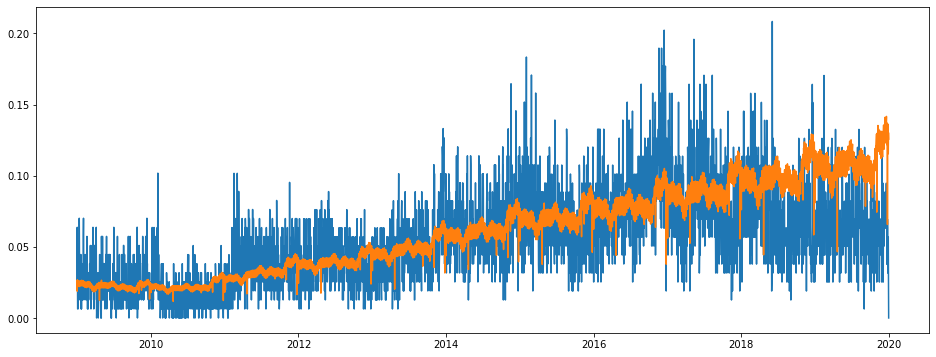

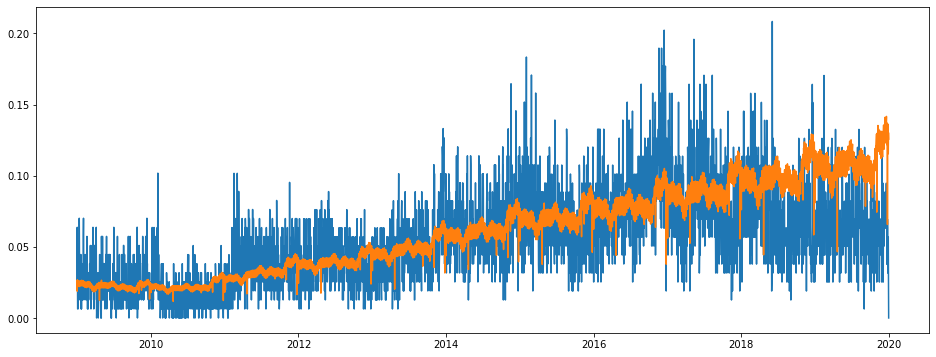

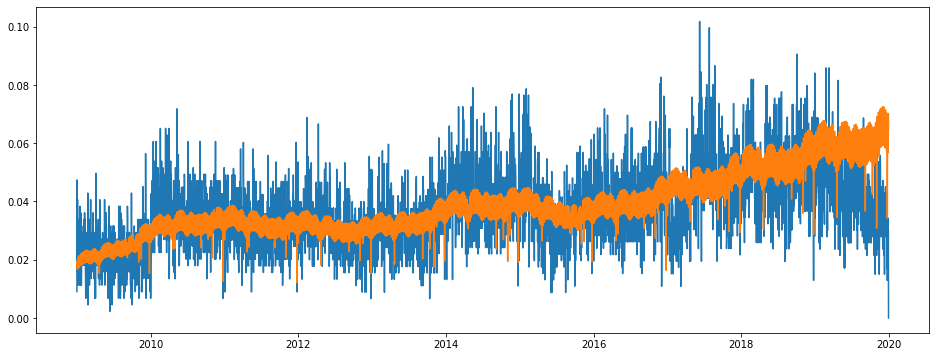

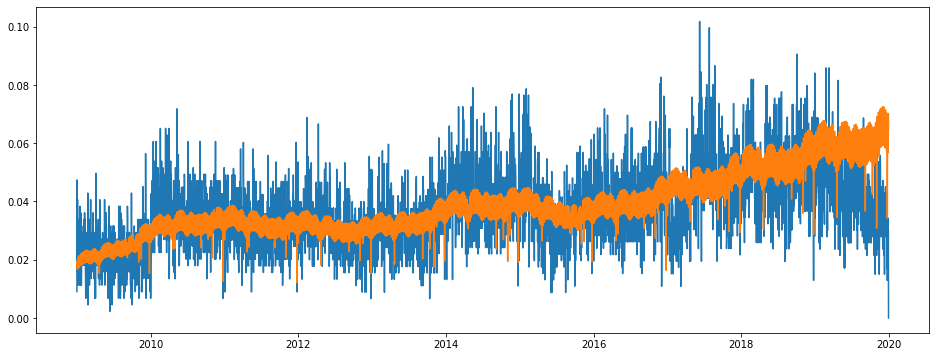

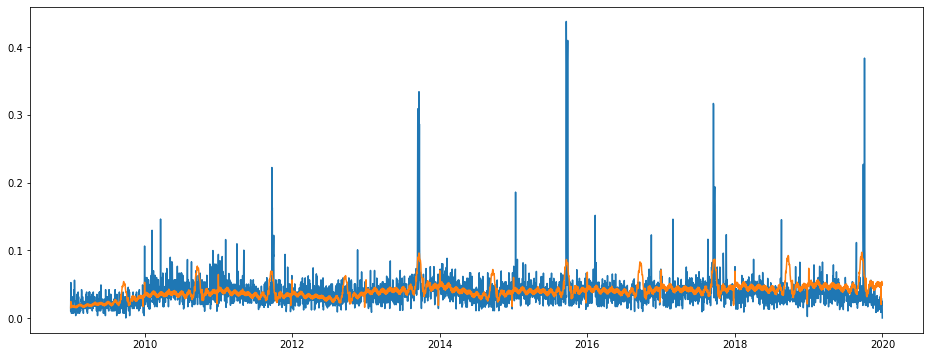

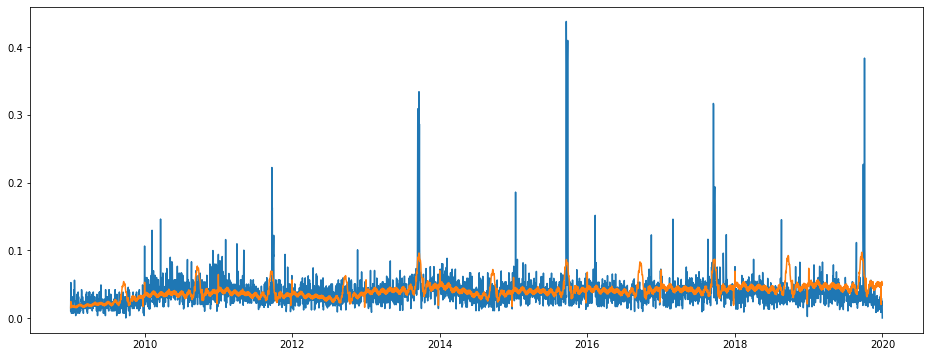

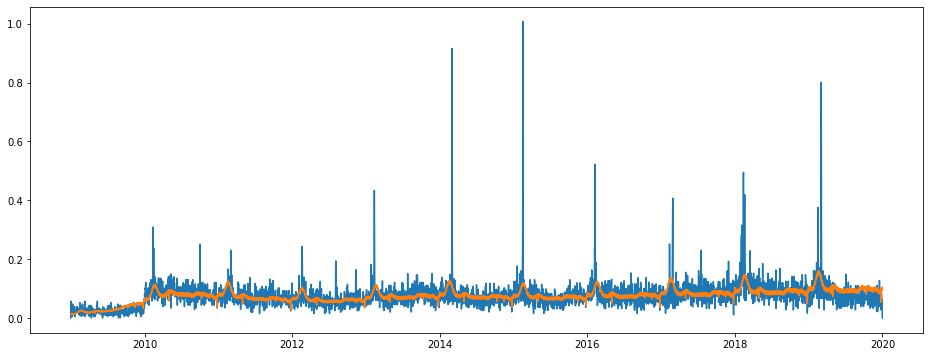

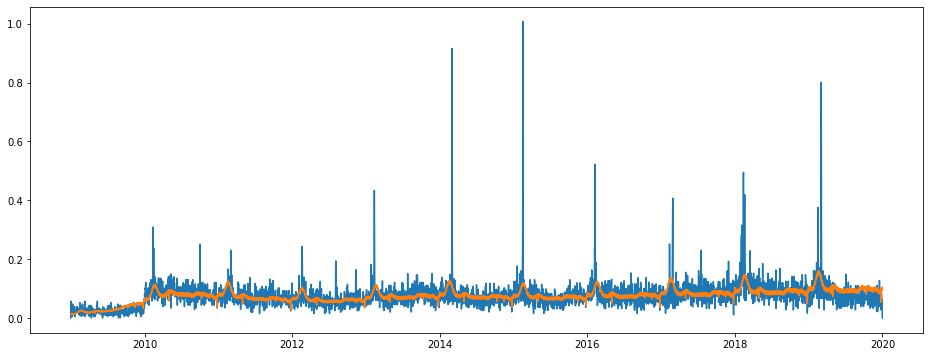

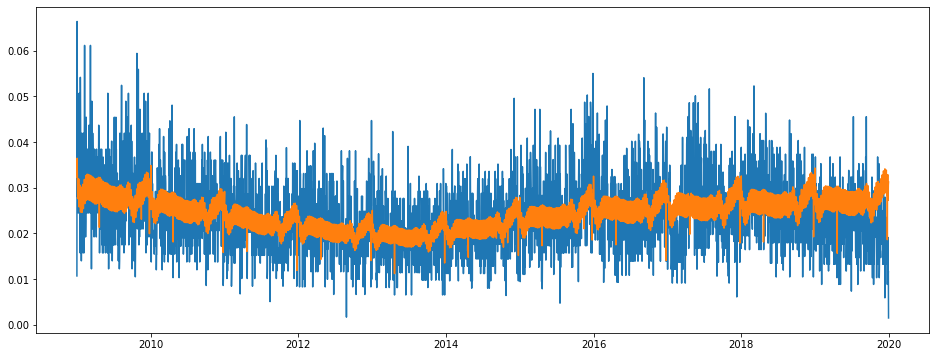

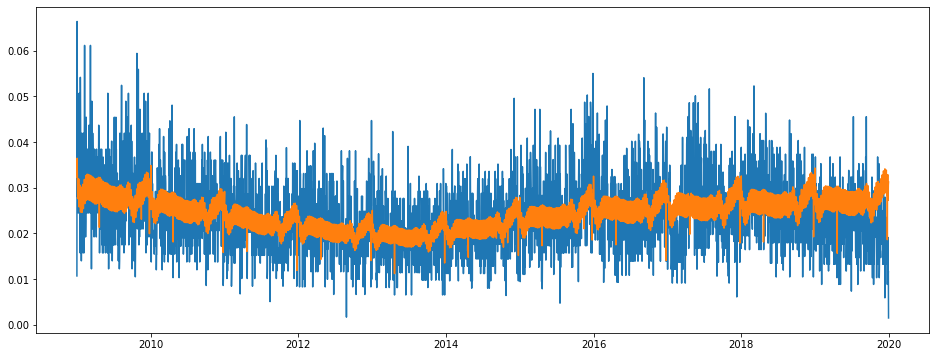

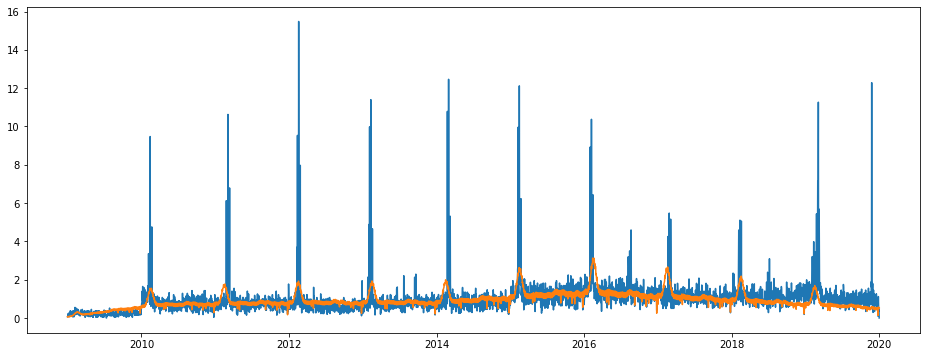

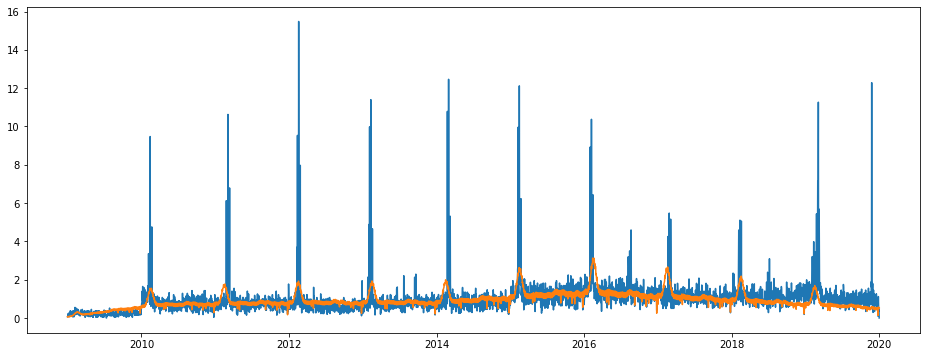

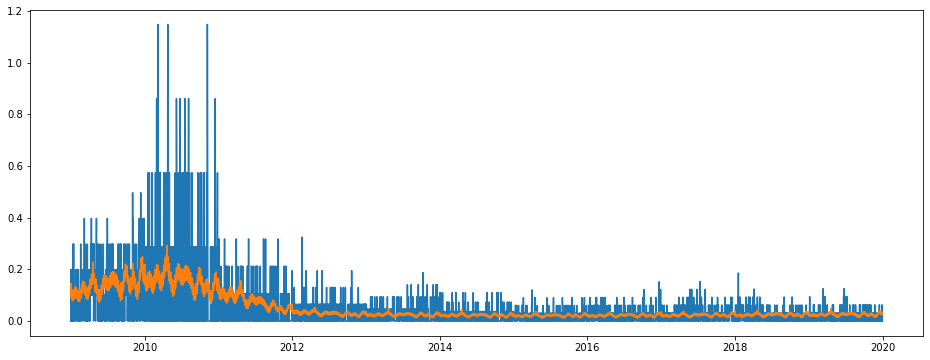

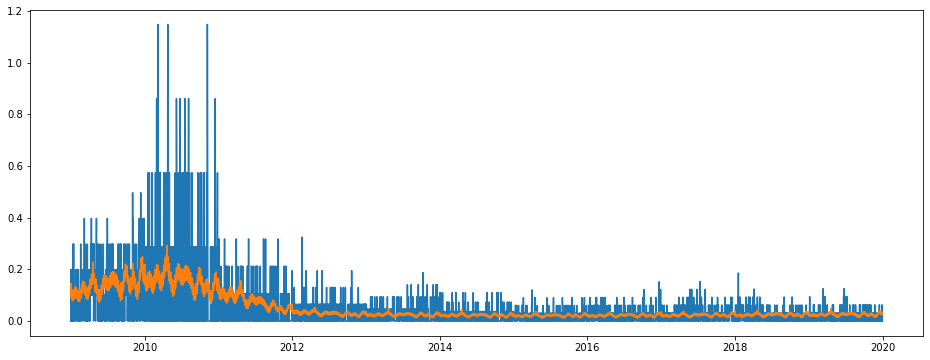

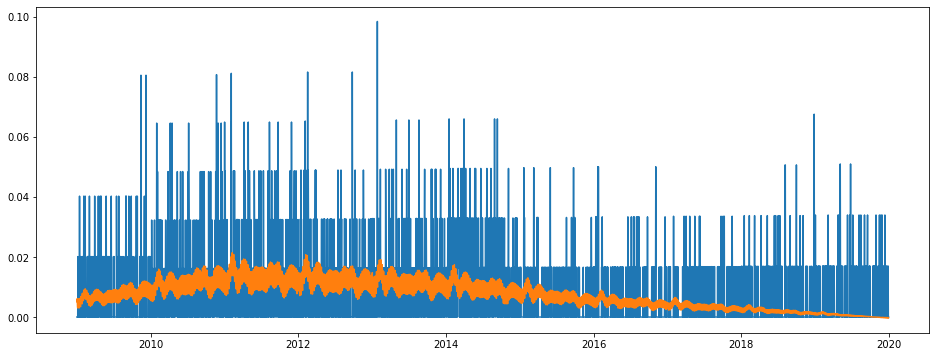

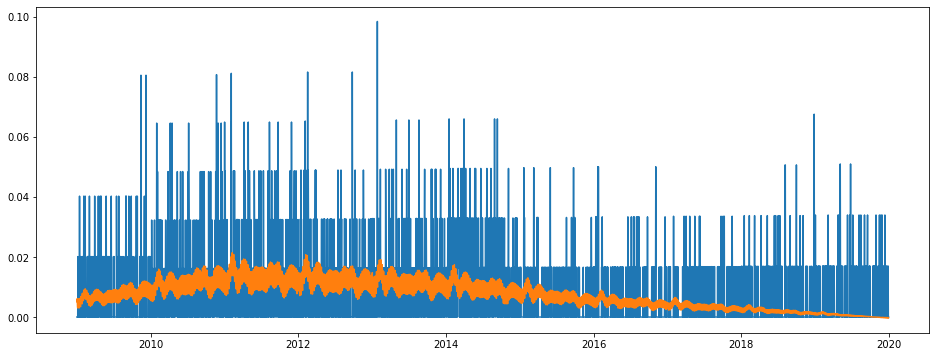

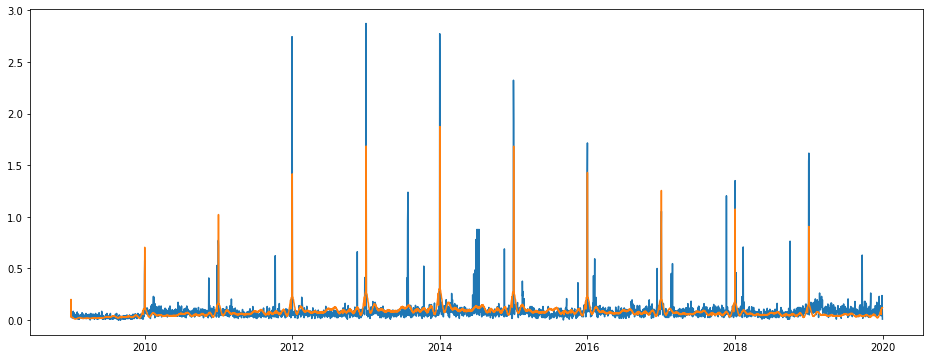

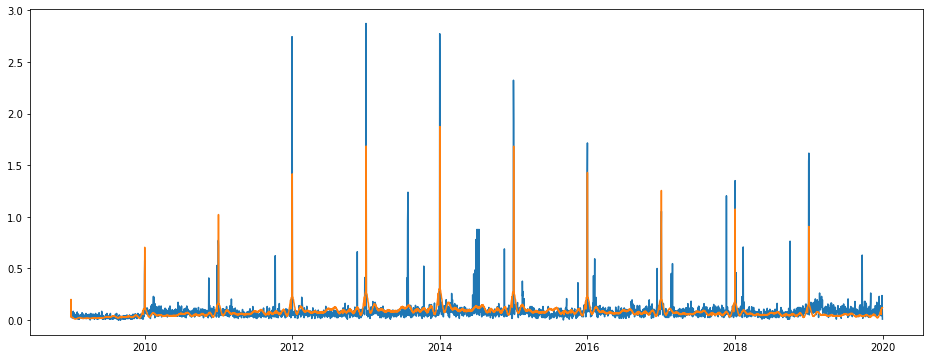

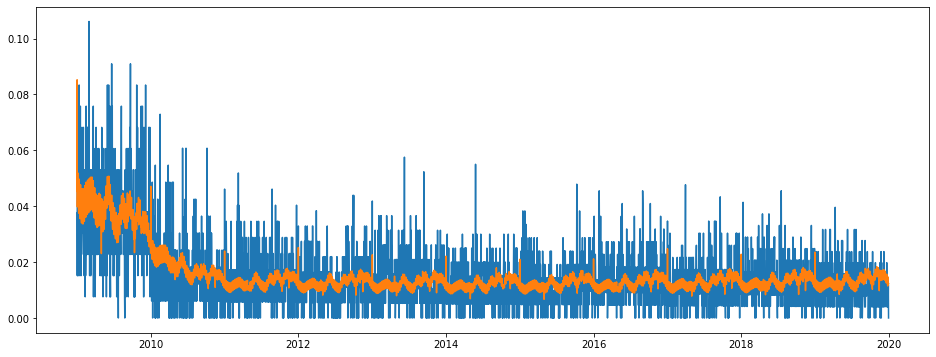

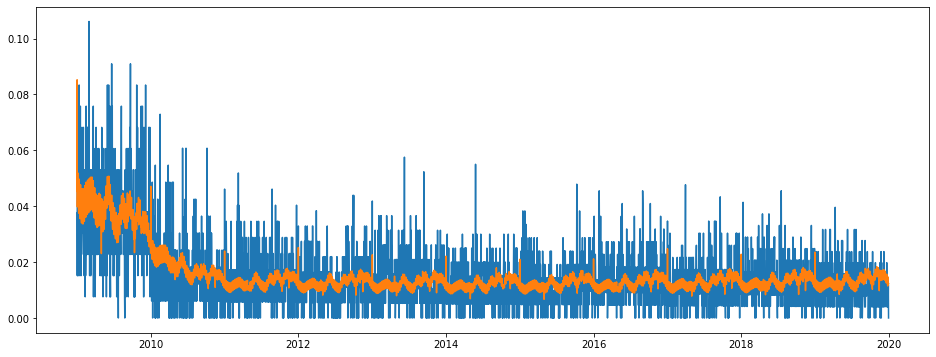

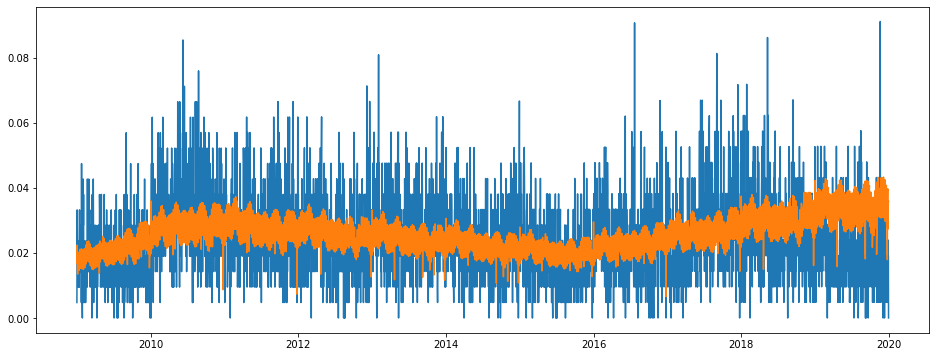

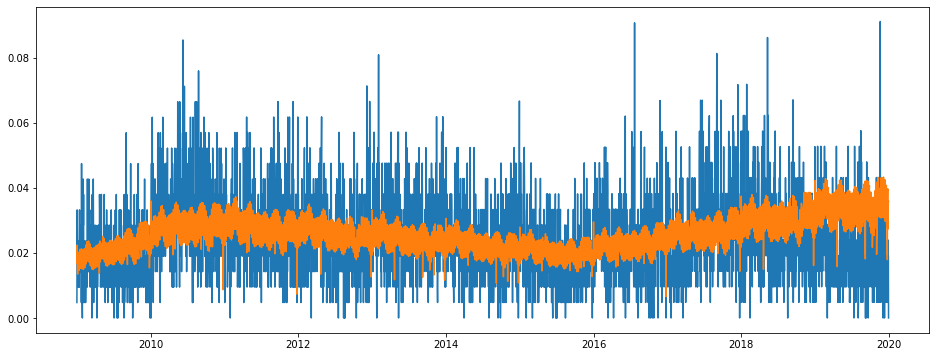

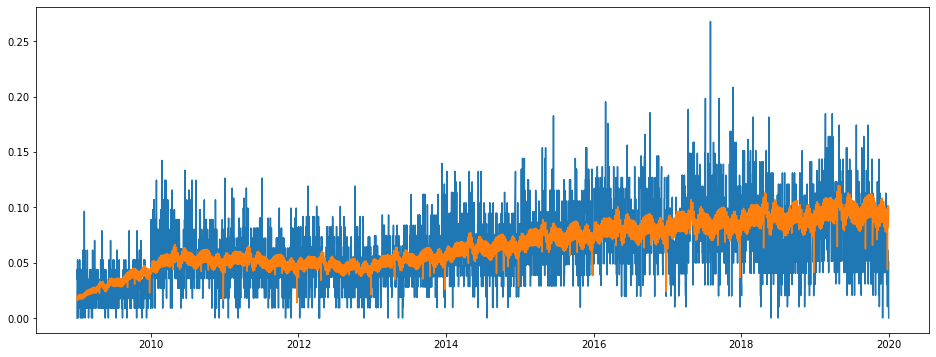

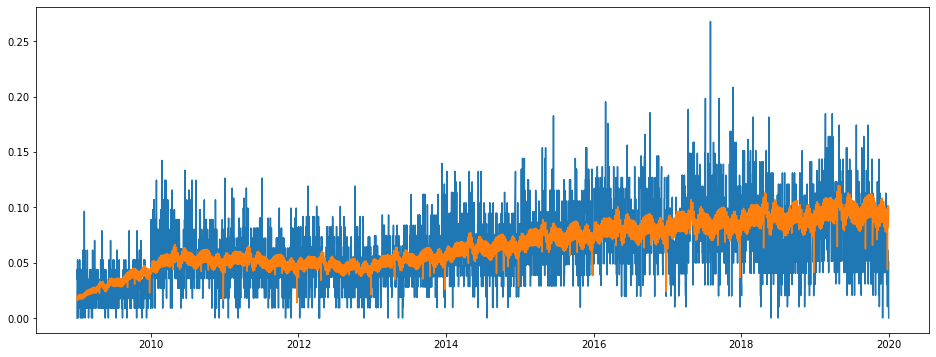

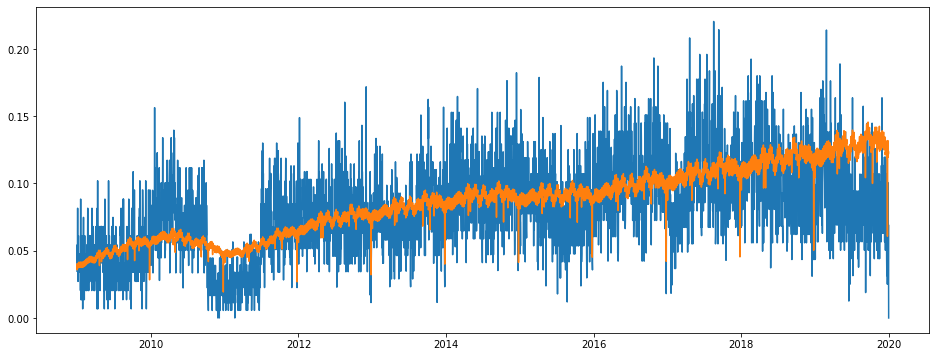

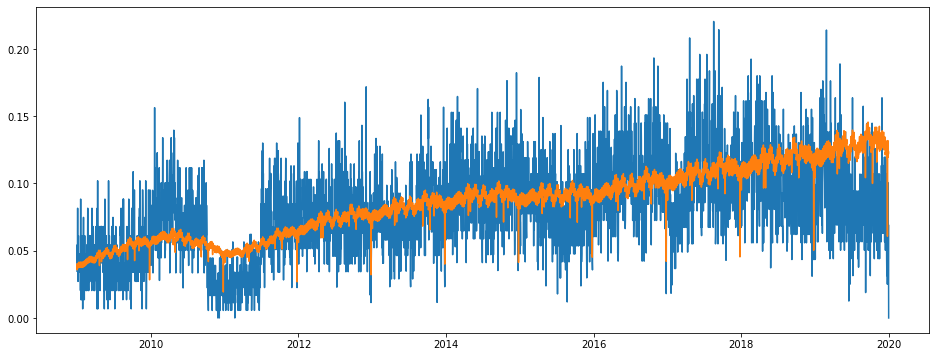

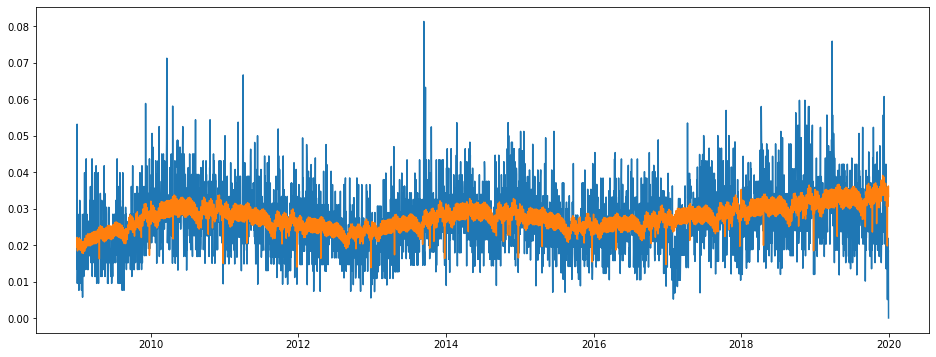

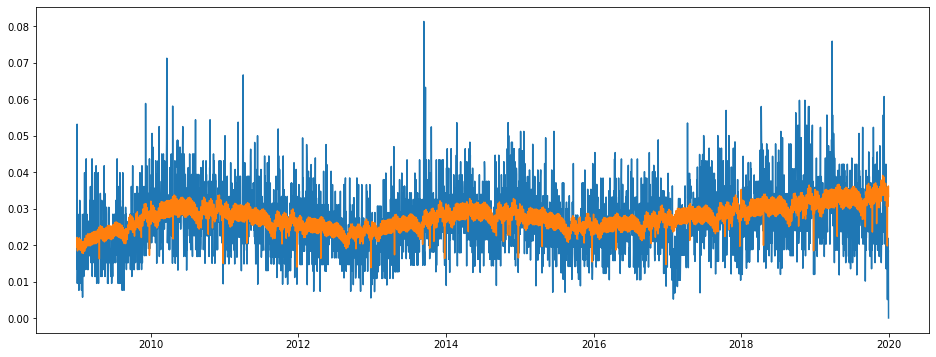

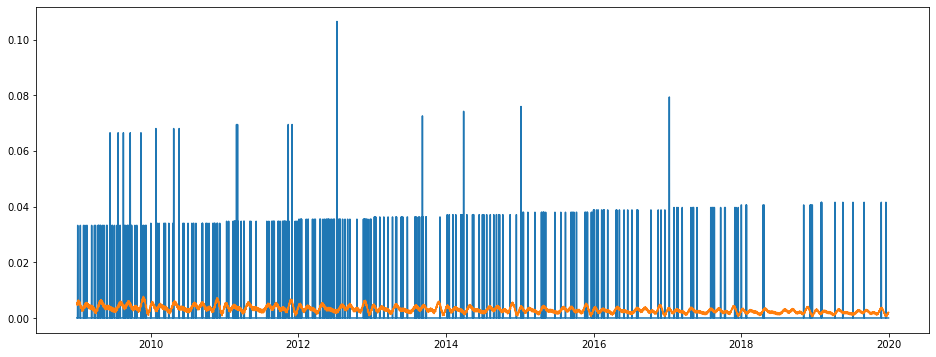

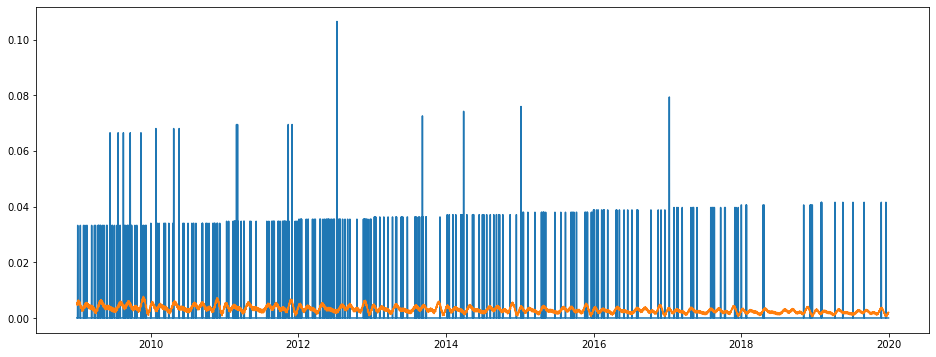

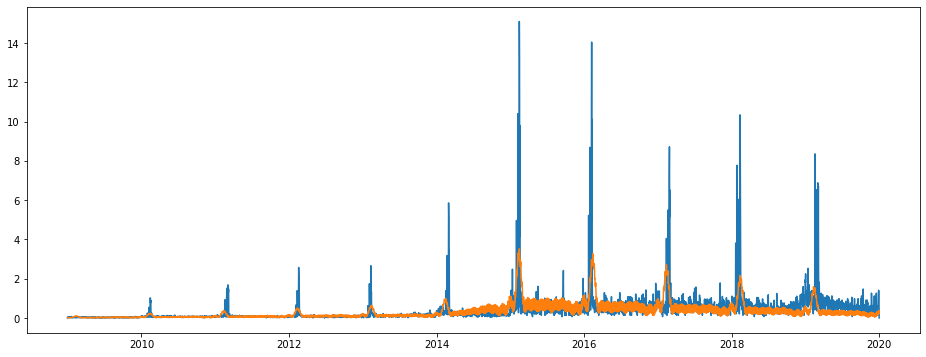

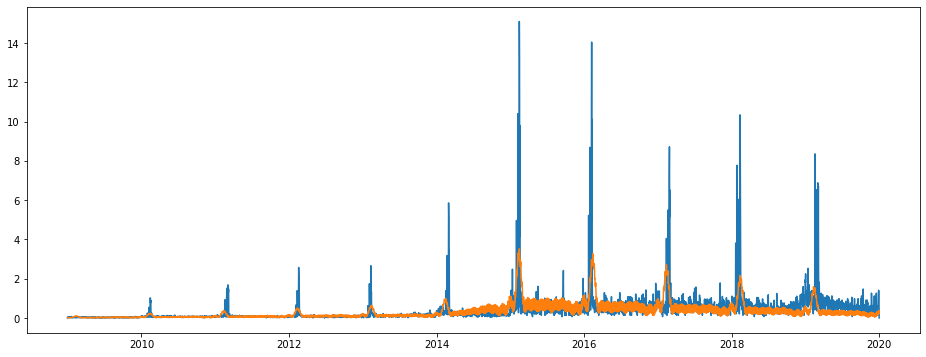

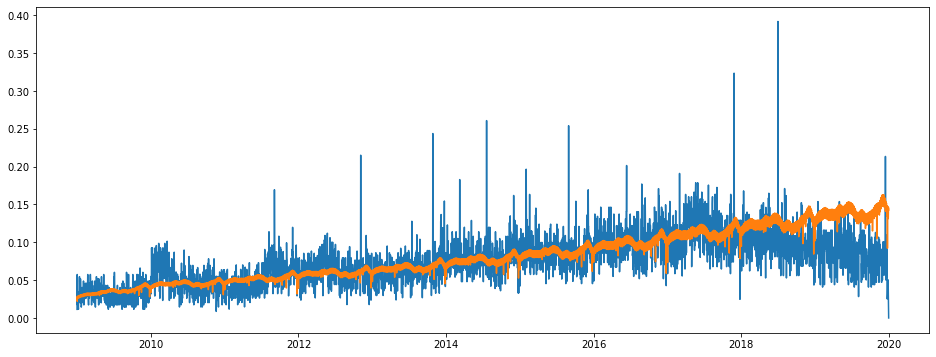

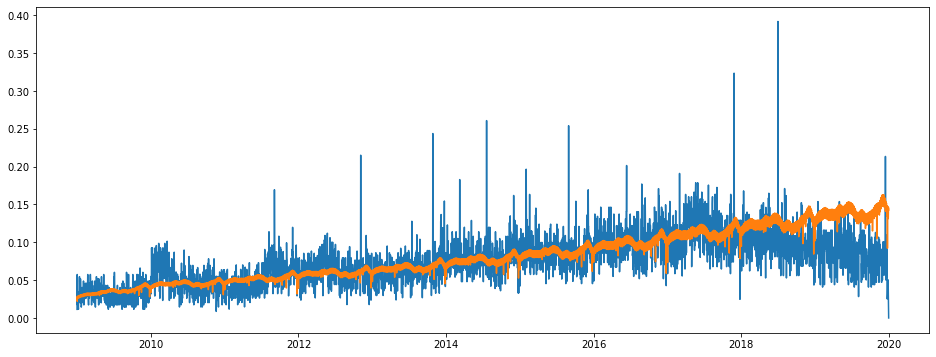

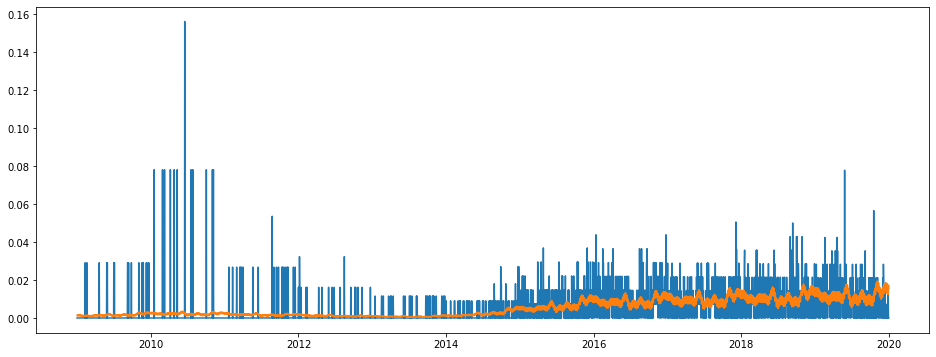

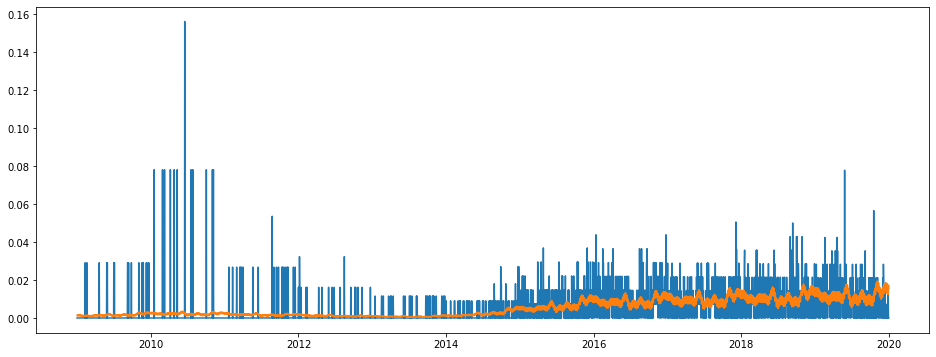

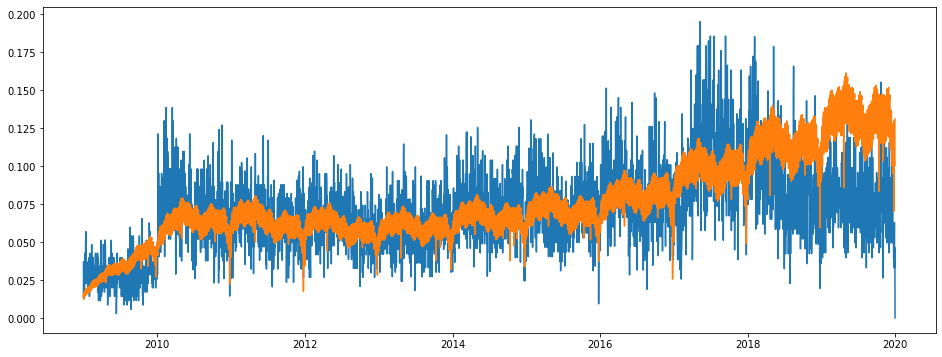

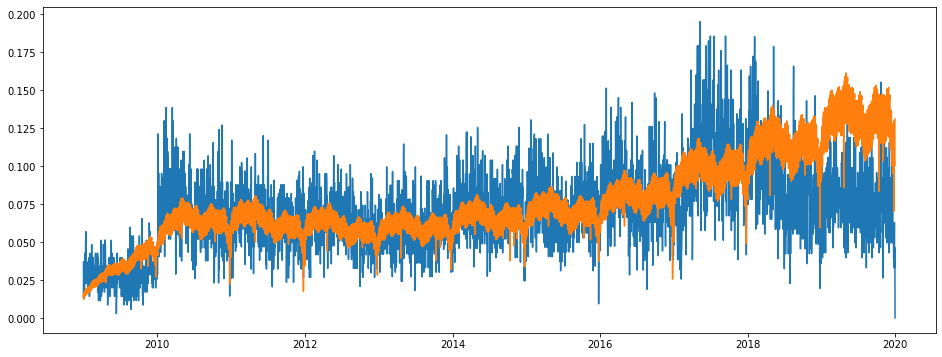

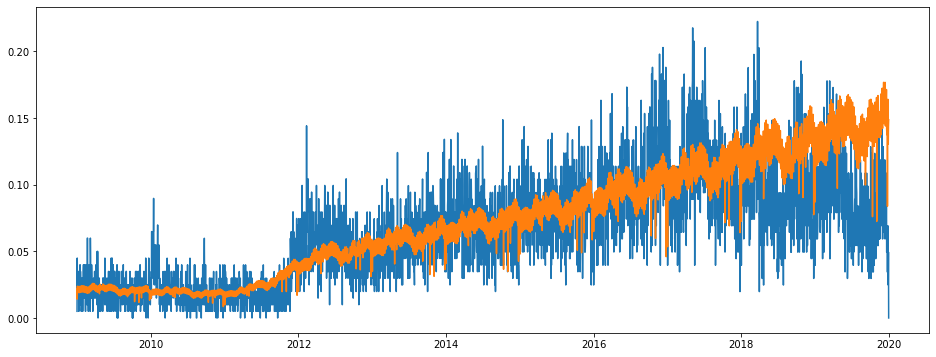

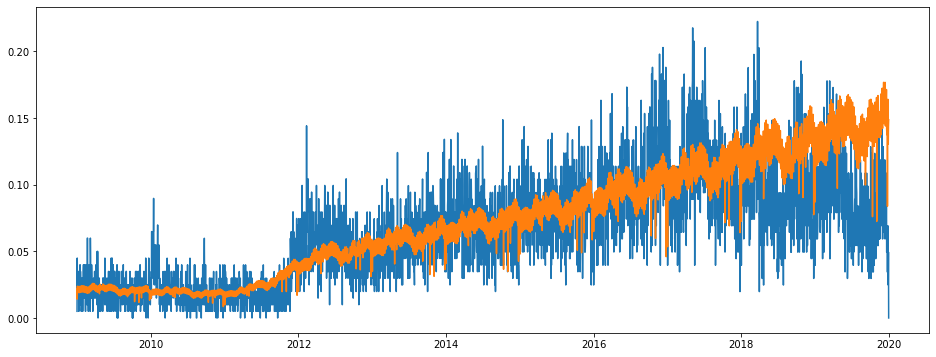

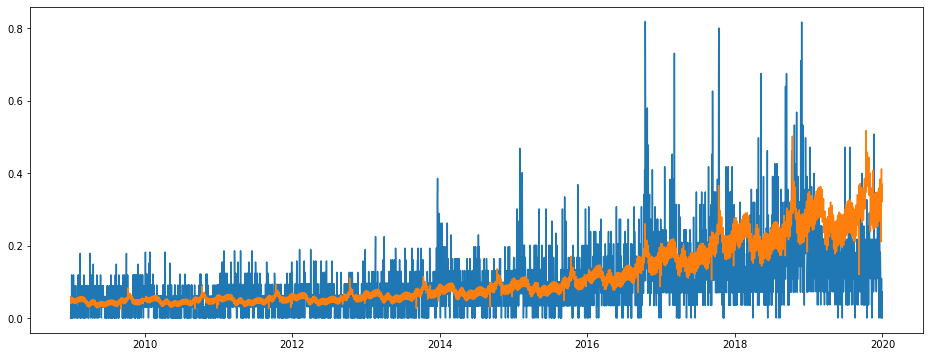

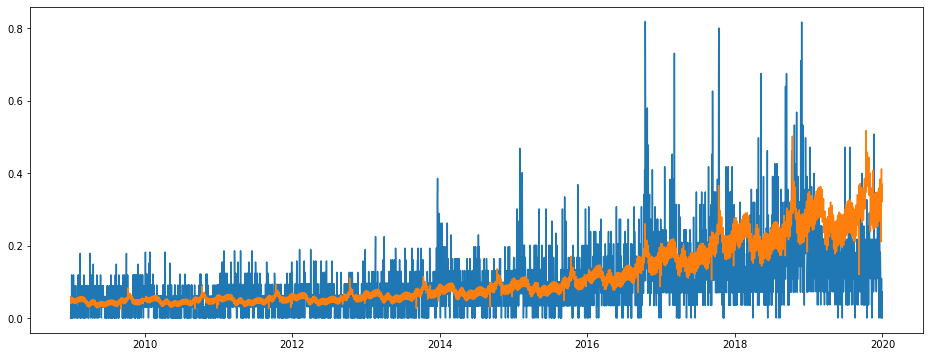

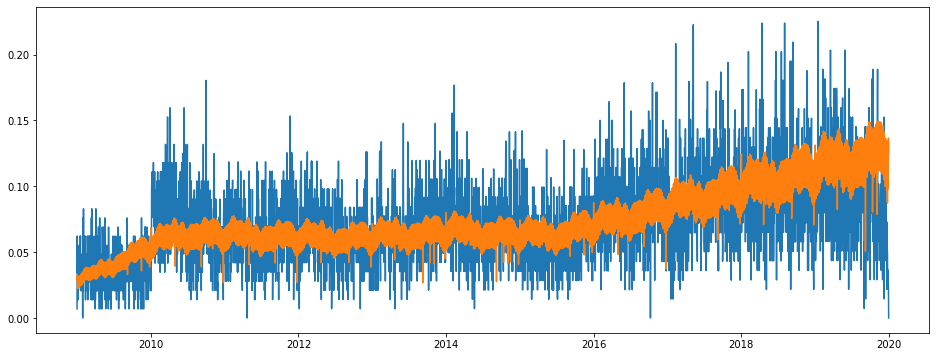

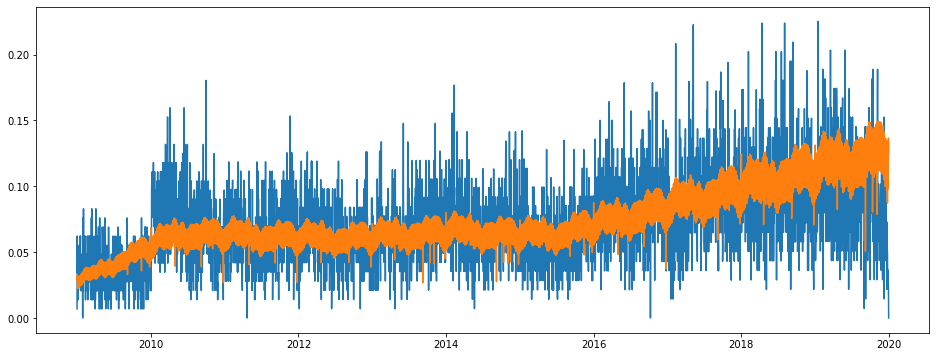

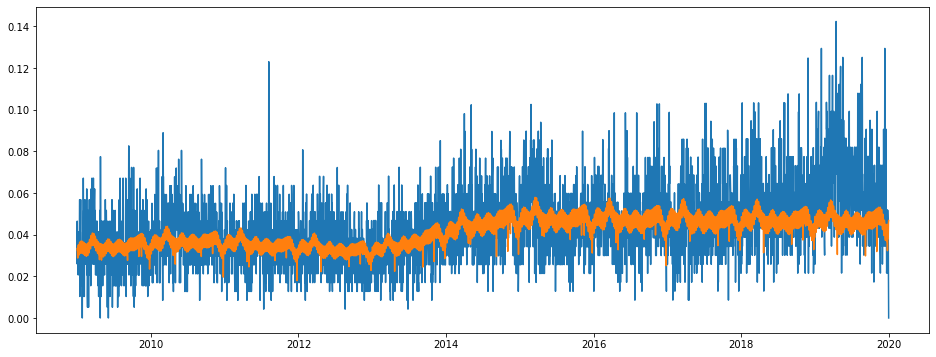

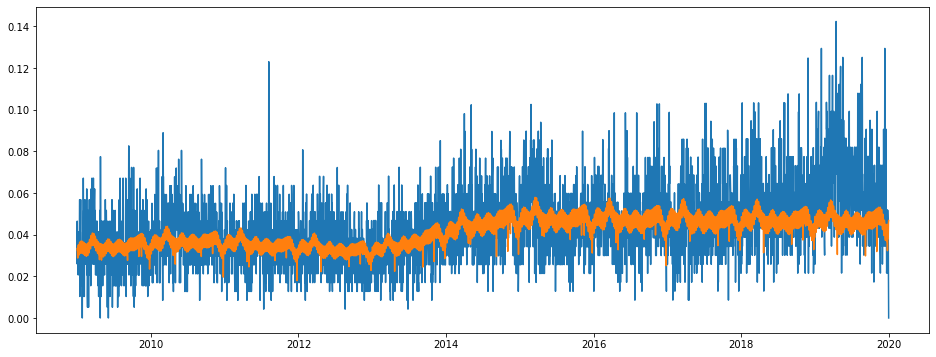

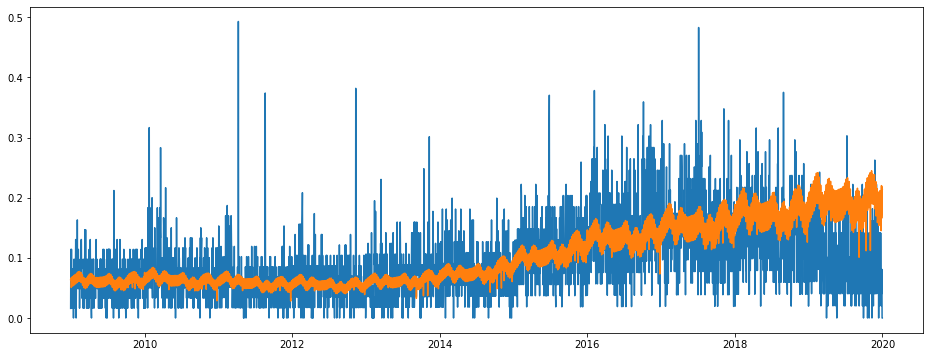

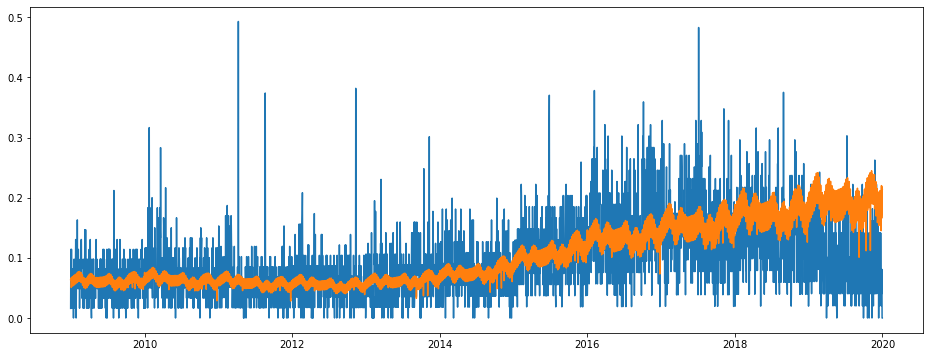

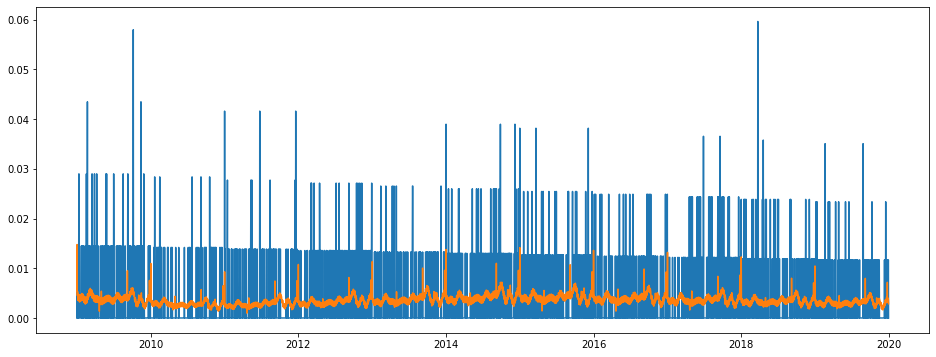

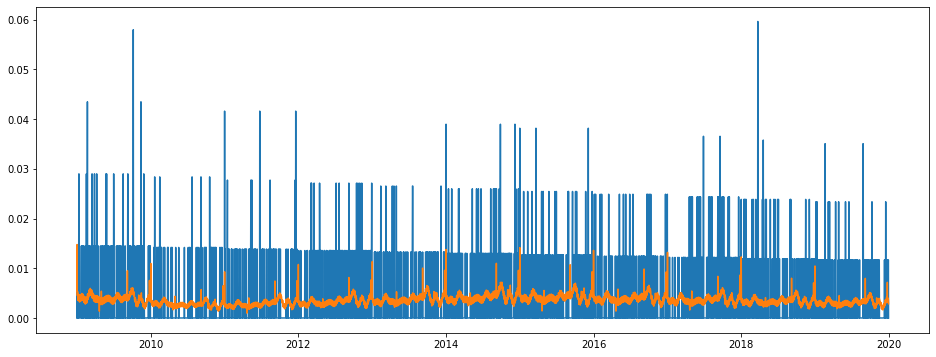

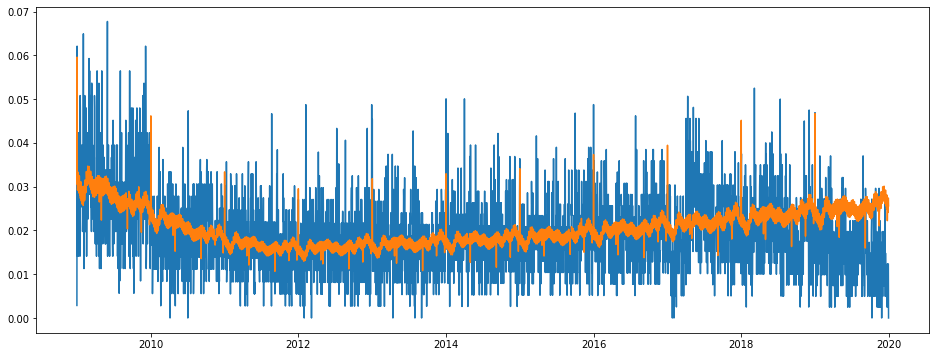

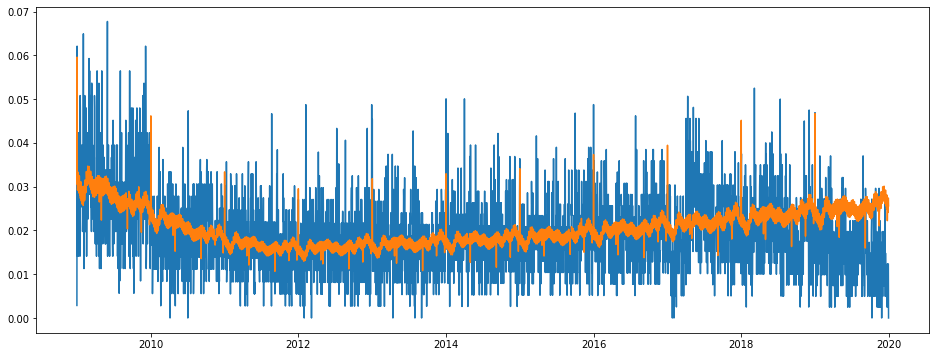

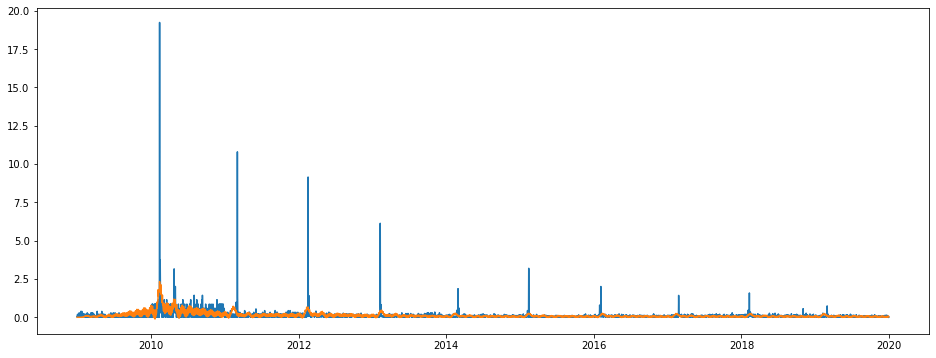

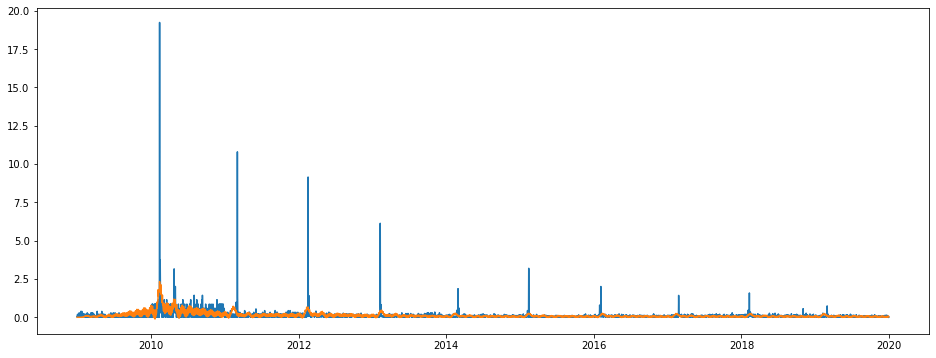

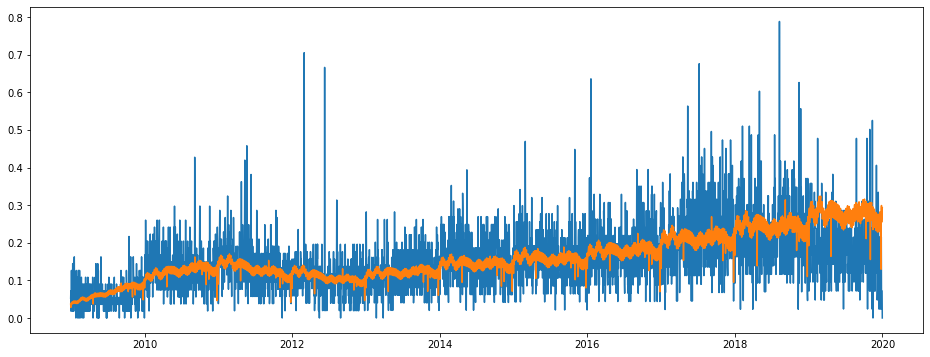

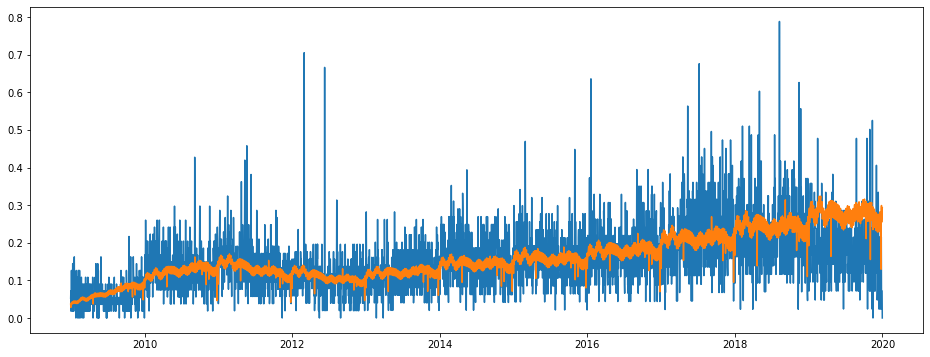

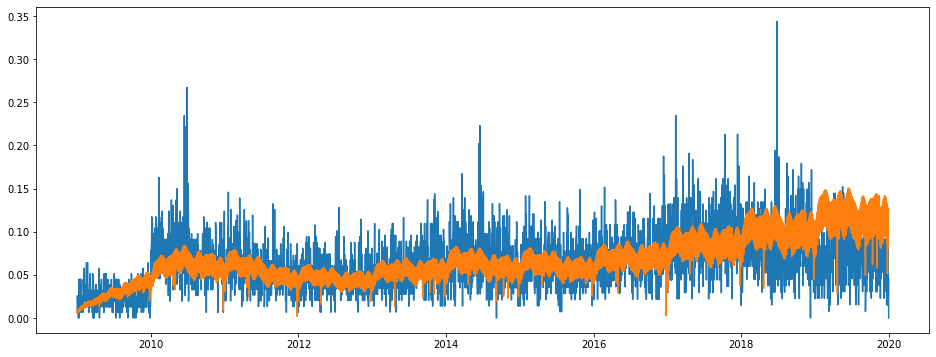

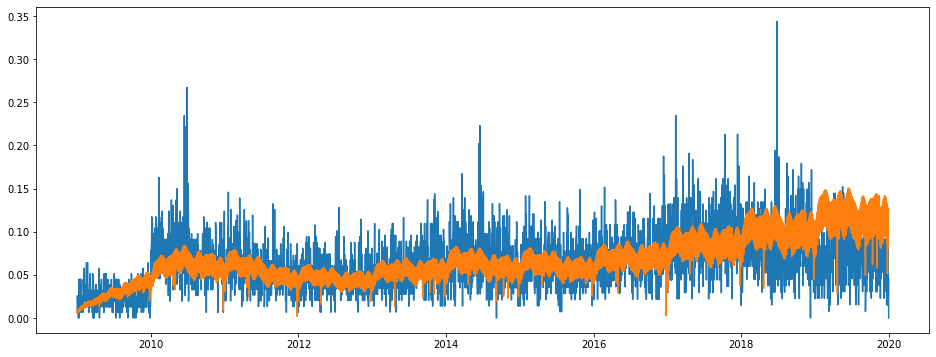

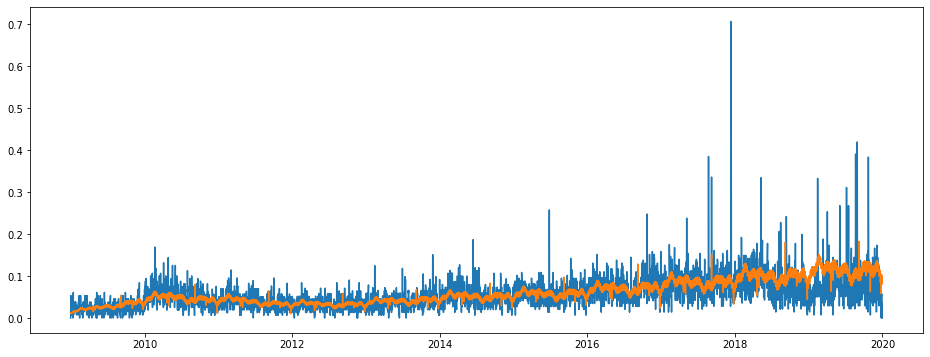

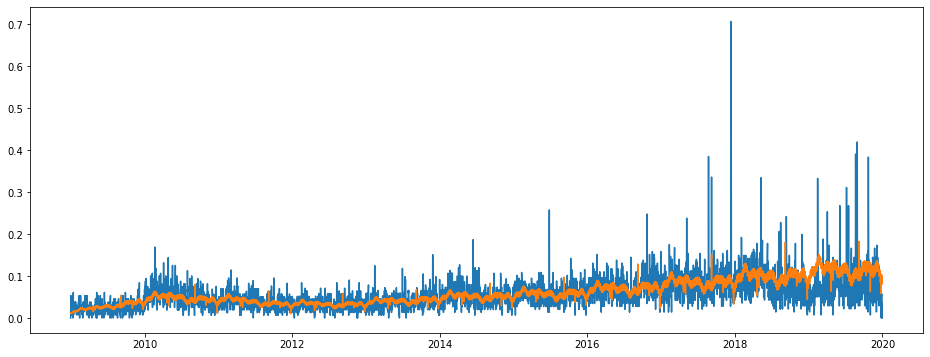

In [457]:
results_prophet=[]
for AR in bairros:
    forecast = prophet.prophet_AR(df2, AR)
    metrics = prophet.get_prophet_metrics(df2, AR)
    results_prophet.append(metrics);

In [458]:
len(results_prophet)

30

In [459]:
results_prophet

[{'mape': 0.37463449243488617,
  'me': -0.03520265454128568,
  'mae': 0.039991636525418345,
  'mpe': -0.3245646273867875,
  'rmse': 0.04620520311519041,
  'corr': nan,
  'minmax': 0.36829561872344363},
 {'mape': 0.25208128926092316,
  'me': -0.01006262622221897,
  'mae': 0.014366139172785498,
  'mpe': -0.17019022001558107,
  'rmse': 0.01762095166073685,
  'corr': nan,
  'minmax': 0.24338963627713894},
 {'mape': 0.33408482023331015,
  'me': -0.011427726698857298,
  'mae': 0.01681645522547239,
  'mpe': -0.2228426606791642,
  'rmse': 0.024427191229993848,
  'corr': nan,
  'minmax': 0.31134197974734257},
 {'mape': 0.2949596784573376,
  'me': -0.005566935393078711,
  'mae': 0.02954578480911133,
  'mpe': -0.06170035752848335,
  'rmse': 0.05012668023616399,
  'corr': nan,
  'minmax': 0.24801180904766296},
 {'mape': 0.25216931971859746,
  'me': -0.0038171595877160803,
  'mae': 0.007020070327219443,
  'mpe': -0.13209116766485657,
  'rmse': 0.00852664064203101,
  'corr': nan,
  'minmax': 0.23745

In [463]:
import metrics

In [470]:
baseline_month_actual_region = metrics.get_baseline_actual(df2)["Centro"]

KeyError: 'AR'

In [473]:
import baseline

In [503]:
results_baseline=[]
for AR in bairros:
    result = baseline.get_baseline_metrics(df2, AR)
    results_baseline.append(result)


/Users/desireepetrilli/Documents/event-forecast-rio/baseline.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  baseline_mean = baseline_data.mean().to_frame().T
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [507]:
results_baseline[0]

{'mape': 0.3098410253041995,
 'me': -0.018886075270203664,
 'mae': 0.02756482177966602,
 'mpe': -0.21228800144134616,
 'rmse': 0.03304546051147505,
 'corr': nan,
 'minmax': 0.29665428119532133}

In [511]:
mape_baseline = []
for i in range(30):
    mape_baseline.append(results_baseline[i]["mape"])

In [512]:
mape_prophet = []
for i in range(30):
    mape_prophet.append(results_prophet[i]["mape"])

In [518]:
sum(mape_prophet)

53.46642301926809

In [519]:
sum(mape_baseline)

15.164177176613425